In [8]:
#lets get the libraries in place
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [9]:
import seaborn as sns

In [10]:
# importing data and doing hygiene/sanity checks

df = pd.read_csv(r"C:\Users\003TKD744\Downloads\loan\loan.csv")
df.head(5)


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [11]:
df.shape

(39717, 111)

In [12]:
pd.set_option('display.max_colwidth',50)
pd.set_option('display.max_columns',140) 
df.head(5)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,NaN,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [13]:
df['acc_now_delinq'].value_counts()

acc_now_delinq
0    39717
Name: count, dtype: int64

### Turns out acc_now_delinq, num_tl_30dpd has no meaningful data

In [15]:
df['tot_coll_amt'].isnull().size

39717

In [17]:
df['num_tl_30dpd'].notnull().any()

False

### Let us see how many columns have all nulls and columns with nulls in general

In [19]:
columns_with_all_nulls = []
other_columns_with_nulls = []

num_rows = len(df)

for column in df.columns:
    null_count = df[column].isnull().sum()
    if null_count == num_rows:
        columns_with_all_nulls.append(column)
    elif null_count > 0:
        other_columns_with_nulls.append(column)

# Print the results
print("Columns with all nulls:", columns_with_all_nulls)
print("Other columns with nulls:", other_columns_with_nulls)


Columns with all nulls: ['mths_since_last_major_derog', 'annual_inc_joint', 'dti_joint', 'verification_status_joint', 'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util', 'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m', 'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util', 'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl', 'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_bc_dlq', 'mths_since_recent_inq', 'mths_since_recent_revol_delinq', 'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl', 'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m', 'num_tl_30dpd', 'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq', 'percent_bc_gt_75', 'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit'

### Lets remove the columns with all Nulls  

In [21]:
df.drop(columns= columns_with_all_nulls, inplace=True)

In [22]:
df.shape

(39717, 57)

### Lets see the rest of the nulls one by one

In [24]:
for column in other_columns_with_nulls:
    
        null_count = df[column].isnull().sum()
        print(f"Column: {column}, Nulls: {null_count}")
    

Column: emp_title, Nulls: 2459
Column: emp_length, Nulls: 1075
Column: desc, Nulls: 12942
Column: title, Nulls: 11
Column: mths_since_last_delinq, Nulls: 25682
Column: mths_since_last_record, Nulls: 36931
Column: revol_util, Nulls: 50
Column: last_pymnt_d, Nulls: 71
Column: next_pymnt_d, Nulls: 38577
Column: last_credit_pull_d, Nulls: 2
Column: collections_12_mths_ex_med, Nulls: 56
Column: chargeoff_within_12_mths, Nulls: 56
Column: pub_rec_bankruptcies, Nulls: 697
Column: tax_liens, Nulls: 39


In [25]:
# starting with pub_rec_bankruptcies
df[df['pub_rec_bankruptcies'] == 0 ]['loan_status'].value_counts()

loan_status
Fully Paid     31097
Charged Off     5141
Current         1101
Name: count, dtype: int64

In [26]:
df[df['pub_rec_bankruptcies'] > 0 ]['loan_status'].value_counts()

loan_status
Fully Paid     1274
Charged Off     368
Current          39
Name: count, dtype: int64

In [27]:
df[df['pub_rec_bankruptcies'].isnull()]['loan_status'].value_counts()

loan_status
Fully Paid     579
Charged Off    118
Name: count, dtype: int64

### going with the popular counts for pub_rec_bankruptcies i.e. 0

In [29]:
df.loc[df['pub_rec_bankruptcies'].isnull(), 'pub_rec_bankruptcies'] = 0

In [30]:
df[df['pub_rec_bankruptcies'].isnull()]['loan_status'].value_counts()

Series([], Name: count, dtype: int64)

### Further more columns to drop to get a lighter df - These are not relevant for analysis

In [32]:
columns_to_drop = ['url', 'desc', 'title', 'zip_code', 'emp_title',  'policy_code' ]

df.drop(columns=columns_to_drop, inplace=True)

### Lets recheck the nulls we should actually be dealing with after culling some columns

In [34]:
for column in other_columns_with_nulls:
    if column in df.columns:
        null_count = df[column].isnull().sum()
        print(f"Column: {column}, Nulls: {null_count}")
    

Column: emp_length, Nulls: 1075
Column: mths_since_last_delinq, Nulls: 25682
Column: mths_since_last_record, Nulls: 36931
Column: revol_util, Nulls: 50
Column: last_pymnt_d, Nulls: 71
Column: next_pymnt_d, Nulls: 38577
Column: last_credit_pull_d, Nulls: 2
Column: collections_12_mths_ex_med, Nulls: 56
Column: chargeoff_within_12_mths, Nulls: 56
Column: pub_rec_bankruptcies, Nulls: 0
Column: tax_liens, Nulls: 39


In [36]:
# starting with emp_length :
df['emp_length'].value_counts()

emp_length
10+ years    8879
< 1 year     4583
2 years      4388
3 years      4095
4 years      3436
5 years      3282
1 year       3240
6 years      2229
7 years      1773
8 years      1479
9 years      1258
Name: count, dtype: int64

In [37]:
df['emp_length'].info()


<class 'pandas.core.series.Series'>
RangeIndex: 39717 entries, 0 to 39716
Series name: emp_length
Non-Null Count  Dtype 
--------------  ----- 
38642 non-null  object
dtypes: object(1)
memory usage: 310.4+ KB


In [38]:
df[df['emp_length'].notnull()].head(10)


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,credit_card,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,car,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,small_business,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,other,CA,20.00,0,Feb-96,1,35.0,NaN,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,1 year,RENT,80000.0,Source Verified,Dec-11,Current,n,other,OR,17.94,0,Jan-96,0,38.0,NaN,15,0,27783,53.90%,38,f,524.06,524.06,3513.330000,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,Jun-16,May-16,0.0,INDIVIDUAL,0,0.0,0,0.0,0.0
5,1075269,1311441,5000,5000,5000.0,36 months,7.90%,156.46,A,A4,3 years,RENT,36000.0,Source Verified,Dec-11,Fully Paid,n,wedding,AZ,11.20,0,Nov-04,3,NaN,NaN,9,0,7963,28.30%,12,f,0.00,0.00,5632.210000,5632.21,5000.00,632.21,0.00,0.00,0.00,Jan-15,161.03,NaN,Jan-16,0.0,INDIVIDUAL,0,0.0,0,0.0,0.0
6,1069639,1304742,7000,7000,7000.0,60 months,15.96%,170.08,C,C5,8 years,RENT,47004.0,Not Verified,Dec-11,Fully Paid,n,debt_consolidation,NC,23.51,0,Jul-05,1,NaN,NaN,7,0,17726,85.60%,11,f,0.00,0.00,10110.840000,10110.84,6985.61,3125.23,0.00,0.00,0.00,May-16,1313.76,NaN,May-16,0.0,INDIVIDUAL,0,0.0,0,0.0,0.0
7,1072053,1288686,3000,3000,3000.0,36 months,18.64%,109.43,E,E1,9 years,RENT,48000.0,Source Verified,Dec-11,Fully Paid,n,car,CA,5.35,0,Jan-07,2,NaN,NaN,4,0,8221,87.50%,4,f,0.00,0.00,3939.135294,3939.14,3000.00,939.14,0.00,0.00,0.00,Jan-15,111.34,NaN,Dec-14,0.0,INDIVIDUAL,0,0.0,0,0.0,0.0
8,1071795,1306957,5600,5600,5600.0,60 months,21.28%,152.39,F,F2,4 years,OWN,40000.0,Source Verified,Dec-11,Charged Off,n,small_business,CA,5.55,0,Apr-04,2,NaN,NaN,11,0,5210,32.60%,13,f,0.00,0.00,646.020000,646.02,162.02,294.94,0.00,189.06,2.09,Apr-12,152.39,NaN,Aug-12,0.0,INDIVIDUAL,0,0.0,0,0.0,0.0
9,1071570,1306721,5375,5375,5350.0,60 months,12.69%,121.45,B,B5,< 1 year,RENT,15000.0,Verified,Dec-11,Charged Off,n,other,TX,18.08,0,Sep-04,0,NaN,NaN,2,0,9279,36.50%,3,f,0.00,0.00,1476.190000,1469.34,673.48,533.42,0.00,269.29,2.52,Nov-12,121.45,NaN,Mar-13,0.0,INDIVIDUAL,0,0.0,0,0.0,0.0


In [39]:

# Extract numbers and convert them to numeric
df['emp_length'] = df['emp_length'].str.extract('(\d+)')

df['emp_length'].describe()

count     38642
unique       10
top          10
freq       8879
Name: emp_length, dtype: object

In [40]:
df['emp_length'].value_counts()

emp_length
10    8879
1     7823
2     4388
3     4095
4     3436
5     3282
6     2229
7     1773
8     1479
9     1258
Name: count, dtype: int64

In [41]:
df[df['emp_length'].notnull()]['emp_length'].astype(int).describe()


count    38642.000000
mean         5.092050
std          3.408338
min          1.000000
25%          2.000000
50%          4.000000
75%          9.000000
max         10.000000
Name: emp_length, dtype: float64

### defaulting the null emp_length to 5 which is the mean here 

In [45]:
df.loc[df['emp_length'].isnull(), 'emp_length'] = 5

In [50]:
df['emp_length'].isnull().any()

False

### Analysing mths_since_last_delinq now 

In [61]:
df[ df['mths_since_last_delinq'] == 0 ].shape[0]

443

In [70]:
df[df['mths_since_last_delinq'].notnull()].shape[0]

14035

### More than half of the data is null for mths_since_last_delinq, dropping the column


In [74]:
df.drop('mths_since_last_delinq', inplace = True, axis = 1)

### Same lines lets delete mths_since_last_record

In [78]:
df.drop('mths_since_last_record', inplace = True, axis = 1)

### Removing % from Revol_util column

In [82]:
df['revol_util'] = df['revol_util'].str.replace('%', '').astype(float)
df.revol_util.value_counts()

revol_util
0.00     977
0.20      63
63.00     62
40.70     58
66.70     58
        ... 
25.74      1
47.36      1
24.65      1
10.61      1
7.28       1
Name: count, Length: 1089, dtype: int64

### revol_util column rows wise analysis - this data is not available and these rows should be removed as it only 50 records to avoid any impact 

In [85]:
df[df['revol_util'].isnull()].head(5)


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
3565,1016416,1244120,8000,8000,8000.0,36 months,19.42%,294.95,E,E3,3,RENT,30000.0,Source Verified,Nov-11,Fully Paid,n,debt_consolidation,IL,18.56,0,Sep-92,1,6,0,0,NaN,10,f,0.0,0.0,10706.010820,10706.01,8000.00,2691.01,15.0,0.00,0.0000,Dec-14,76.83,NaN,Dec-15,0.0,INDIVIDUAL,0,0.0,0,0.0,0.0
4714,997734,1222858,6100,6100,6100.0,36 months,14.27%,209.29,C,C2,5,MORTGAGE,23748.0,Verified,Nov-11,Charged Off,n,home_improvement,MO,23.95,0,May-02,0,2,0,0,NaN,4,f,0.0,0.0,1755.220000,1755.22,989.91,471.90,0.0,293.41,2.8200,Jun-12,209.29,NaN,Nov-12,0.0,INDIVIDUAL,0,0.0,0,0.0,0.0
4943,790093,994164,7200,7200,7200.0,36 months,14.27%,247.03,C,C2,7,RENT,48000.0,Not Verified,Oct-11,Fully Paid,n,debt_consolidation,CA,15.28,0,Mar-97,0,2,0,0,NaN,25,f,0.0,0.0,7306.070000,7306.07,7200.00,106.07,0.0,0.00,0.0000,Apr-12,66.27,NaN,Mar-14,0.0,INDIVIDUAL,0,0.0,0,0.0,0.0
11282,817195,1024992,5000,5000,5000.0,36 months,21.36%,189.31,F,F4,5,MORTGAGE,35000.0,Not Verified,Jul-11,Fully Paid,n,home_improvement,WA,21.91,0,Dec-07,2,2,0,0,NaN,5,f,0.0,0.0,6814.700817,6814.70,5000.00,1814.70,0.0,0.00,0.0000,Aug-14,204.01,NaN,Feb-15,0.0,INDIVIDUAL,0,0.0,0,0.0,0.0
12042,804073,1009899,3000,3000,3000.0,60 months,22.11%,83.05,G,G1,6,OWN,17652.0,Source Verified,Jul-11,Charged Off,n,other,MN,0.00,0,Jan-08,0,3,0,0,NaN,5,f,0.0,0.0,498.490000,498.49,113.96,217.52,0.0,167.01,30.0618,Nov-11,83.05,NaN,Apr-12,0.0,INDIVIDUAL,0,0.0,0,0.0,0.0


In [87]:
df.dropna(subset=['revol_util'], inplace=True)

In [89]:
df.revol_util.isnull().any()

False

In [91]:
df.shape

(39667, 49)

### Checking last_pymnt_d column

In [94]:
df[df.last_pymnt_d.isnull()].head(10)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
26,1069800,1304679,15000,15000,8725.0,36 months,14.27%,514.64,C,C2,9,RENT,60000.0,Not Verified,Dec-11,Charged Off,n,debt_consolidation,NY,15.22,0,Oct-03,1,7,0,5872,57.6,11,f,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.00,0.0000,NaN,0.0,NaN,May-16,0.0,INDIVIDUAL,0,0.0,0,0.0,0.0
2724,1032519,1262161,8000,8000,3975.0,36 months,14.65%,275.96,C,C3,10,RENT,72000.0,Source Verified,Nov-11,Charged Off,n,debt_consolidation,NC,22.28,0,Nov-97,1,10,0,32955,85.8,31,f,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.00,0.0000,NaN,0.0,NaN,May-16,0.0,INDIVIDUAL,0,0.0,0,0.0,0.0
3613,1016039,1243723,6400,6400,6400.0,60 months,18.25%,163.39,D,D5,5,RENT,33000.0,Source Verified,Nov-11,Charged Off,n,major_purchase,OH,9.05,0,Jun-06,3,4,0,2237,60.5,6,f,0.0,0.0,366.75,366.75,0.0,0.0,0.0,366.75,66.0150,NaN,0.0,NaN,Apr-12,0.0,INDIVIDUAL,0,0.0,0,0.0,0.0
3985,1009833,1236591,18000,18000,18000.0,60 months,19.03%,467.23,E,E2,4,RENT,36000.0,Verified,Nov-11,Charged Off,n,debt_consolidation,CT,5.43,0,Aug-08,1,13,0,4545,18.6,17,f,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.00,0.0000,NaN,0.0,NaN,Apr-16,0.0,INDIVIDUAL,0,0.0,0,0.0,0.0
4206,1006579,1232989,1800,1800,1800.0,36 months,8.90%,57.16,A,A5,9,RENT,50400.0,Not Verified,Nov-11,Charged Off,n,wedding,CA,2.64,0,Oct-98,1,3,0,1930,16.1,10,f,0.0,0.0,1800.00,1800.00,0.0,0.0,0.0,1800.00,0.0000,NaN,0.0,NaN,May-16,0.0,INDIVIDUAL,0,0.0,0,0.0,0.0
4803,996977,1221844,1500,1500,1500.0,36 months,16.29%,52.96,D,D1,1,RENT,27000.0,Not Verified,Oct-11,Charged Off,n,wedding,GA,18.53,0,Sep-07,2,9,0,743,26.5,12,f,0.0,0.0,86.05,86.05,0.0,0.0,0.0,86.05,15.4890,NaN,0.0,NaN,Apr-12,0.0,INDIVIDUAL,0,0.0,0,0.0,0.0
5716,980312,1203495,2000,2000,2000.0,36 months,7.51%,62.23,A,A3,4,RENT,18000.0,Not Verified,Oct-11,Charged Off,n,other,CA,16.73,0,Jul-04,0,5,0,2925,33.2,20,f,0.0,0.0,89.89,89.89,0.0,0.0,0.0,89.89,0.8700,NaN,0.0,NaN,Mar-12,0.0,INDIVIDUAL,0,0.0,0,0.0,0.0
6253,971529,1193277,1400,1400,1400.0,36 months,8.90%,44.46,A,A5,8,MORTGAGE,28800.0,Not Verified,Oct-11,Charged Off,n,debt_consolidation,TX,22.25,1,Feb-06,1,6,0,612,29.1,26,f,0.0,0.0,62.86,62.86,0.0,0.0,0.0,62.86,0.5900,NaN,0.0,NaN,Sep-15,0.0,INDIVIDUAL,0,0.0,0,0.0,0.0
6259,971449,1193186,30000,30000,7100.0,60 months,19.03%,778.72,E,E2,10,MORTGAGE,51600.0,Verified,Oct-11,Charged Off,n,debt_consolidation,TX,19.09,0,Dec-99,3,9,0,22880,83.5,48,f,0.0,0.0,1719.57,406.96,0.0,0.0,0.0,1719.57,309.5226,NaN,0.0,NaN,Mar-12,0.0,INDIVIDUAL,0,0.0,0,0.0,0.0
6768,892468,1109415,4000,4000,3975.0,60 months,19.03%,103.83,E,E2,1,RENT,19200.0,Source Verified,Sep-11,Charged Off,n,debt_consolidation,MO,12.75,0,Aug-99,3,6,0,3887,82.7,7,f,0.0,0.0,179.57,178.45,0.0,0.0,0.0,179.57,1.6600,NaN,0.0,NaN,Mar-12,0.0,INDIVIDUAL,0,0.0,0,0.0,0.0


### Last payment date is mostly blank(67/71) for Charged off customers - we keep it that way 

In [97]:
df[df.last_pymnt_d.isnull()].loan_status.value_counts()

loan_status
Charged Off    67
Name: count, dtype: int64

### Next_pymnt_d column

In [100]:
df[df['next_pymnt_d'].notnull()]

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
4,1075358,1311748,3000,3000,3000.00000,60 months,12.69%,67.79,B,B5,1,RENT,80000.0,Source Verified,Dec-11,Current,n,other,OR,17.94,0,Jan-96,0,15,0,27783,53.9,38,f,524.06,524.06,3513.33,3513.33,2475.94,1037.39,0.0,0.0,0.0,May-16,67.79,Jun-16,May-16,0.0,INDIVIDUAL,0,0.0,0,0.0,0.0
32,1065420,1299514,10000,10000,9975.00000,60 months,15.96%,242.97,C,C5,2,RENT,29120.0,Verified,Dec-11,Current,n,debt_consolidation,FL,22.83,0,Feb-97,1,11,0,16158,63.6,31,f,1849.10,1844.43,12594.24,12562.85,8150.89,4443.35,0.0,0.0,0.0,May-16,242.97,Jun-16,Apr-16,0.0,INDIVIDUAL,0,0.0,0,0.0,0.0
39,1069346,1304237,12500,12500,12475.00000,60 months,12.69%,282.44,B,B5,1,RENT,27000.0,Verified,Dec-11,Current,n,debt_consolidation,IL,16.04,0,Dec-01,3,6,0,10143,50.0,24,f,2181.42,2177.03,14636.30,14607.08,10318.58,4317.72,0.0,0.0,0.0,May-16,282.44,Jun-16,May-16,0.0,INDIVIDUAL,0,0.0,0,0.0,0.0
86,1063958,1297940,14000,14000,13975.00000,60 months,17.27%,349.98,D,D3,4,RENT,28000.0,Verified,Dec-11,Current,n,other,WA,6.34,0,Jul-05,2,5,0,6986,79.4,10,f,2637.34,2632.59,18176.96,18144.59,11362.67,6814.29,0.0,0.0,0.0,May-16,349.98,Jun-16,May-16,0.0,INDIVIDUAL,0,0.0,0,0.0,0.0
95,1068575,1303001,15300,15300,15275.00000,60 months,22.06%,423.10,F,F4,6,RENT,85000.0,Verified,Dec-11,Current,n,credit_card,VA,20.58,0,Feb-84,2,14,0,26524,89.7,27,f,3125.79,3120.68,21988.20,21952.28,12174.21,9813.99,0.0,0.0,0.0,May-16,423.10,Jun-16,May-16,0.0,INDIVIDUAL,0,0.0,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15972,725556,920821,10400,10400,10400.00000,60 months,6.00%,218.99,E,E3,5,MORTGAGE,29000.0,Source Verified,May-11,Current,n,credit_card,TX,10.84,0,Nov-02,0,7,0,8696,95.6,15,f,238.82,238.82,13886.92,13886.92,10161.18,3725.74,0.0,0.0,0.0,May-16,218.99,Jun-16,May-16,0.0,INDIVIDUAL,0,0.0,0,0.0,0.0
15981,738420,935790,6000,6000,6000.00000,60 months,10.37%,128.58,B,B3,1,RENT,24000.0,Source Verified,Apr-11,Current,n,car,NY,11.05,0,Oct-05,0,6,0,12,0.2,9,f,10.26,10.26,7701.15,7701.15,5989.74,1711.41,0.0,0.0,0.0,May-16,128.58,Jun-16,May-16,0.0,INDIVIDUAL,0,0.0,0,0.0,0.0
16361,733695,930086,19200,19200,18847.76292,60 months,10.74%,414.97,B,B4,5,MORTGAGE,100000.0,Verified,Apr-11,Current,n,small_business,NJ,4.43,0,Jan-91,0,6,0,0,0.0,10,f,19.12,19.09,24894.24,24310.75,19180.88,5713.36,0.0,0.0,0.0,May-16,414.97,Jun-16,May-16,0.0,INDIVIDUAL,0,0.0,0,0.0,0.0
16609,728422,924106,9350,9350,9350.00000,60 months,10.00%,198.66,B,B2,8,RENT,66000.0,Not Verified,Apr-11,Current,n,car,NY,4.84,0,Dec-01,0,4,0,88,5.9,7,f,13.28,13.28,11906.14,11906.14,9336.72,2569.42,0.0,0.0,0.0,May-16,198.66,Jun-16,Apr-16,0.0,INDIVIDUAL,0,0.0,0,0.0,0.0


### Lets check Loan status wise split

In [103]:
df.loan_status.value_counts()

loan_status
Fully Paid     32916
Charged Off     5611
Current         1140
Name: count, dtype: int64

### It is observed that next payment date is only available for the current ongoing loans . Hence that is also left as it is 

### Now moving on to last credit pull date - only 2 blank values with no specific reason to be blank . We drop these two rows

In [107]:
df[df['last_credit_pull_d'].isnull()]

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
26025,575712,740467,5000,5000,5000.0,36 months,11.12%,163.98,B,B3,5,RENT,96000.0,Not Verified,Sep-10,Charged Off,n,small_business,CA,4.04,0,Oct-97,0,4,0,7172,80.6,9,f,0.0,0.0,3362.960000,3362.96,2553.55,702.45,0.0,106.96,1.34,Jun-12,163.98,NaN,NaN,0.0,INDIVIDUAL,0,0.0,0,0.0,0.0
39476,186499,186347,1000,1000,875.0,36 months,7.12%,30.94,A,A1,1,MORTGAGE,120000.0,Not Verified,Dec-07,Fully Paid,n,other,CA,0.65,0,Jul-97,1,7,0,2227,3.8,37,f,0.0,0.0,1110.813028,971.96,1000.00,110.81,0.0,0.00,0.00,Aug-10,185.80,NaN,NaN,0.0,INDIVIDUAL,0,0.0,0,0.0,0.0


In [109]:
df.dropna(subset=['last_credit_pull_d'], inplace=True)

### collections_12_mths_ex_med has no relevance substantial, hence dropping this too !

In [112]:
df.drop('collections_12_mths_ex_med',inplace = True, axis = 1)

In [114]:
df.chargeoff_within_12_mths.value_counts()

chargeoff_within_12_mths
0.0    39609
Name: count, dtype: int64

### It is best advised to drop chargeoff within 12 months column 

In [117]:
df.drop('chargeoff_within_12_mths',inplace = True, axis = 1)

In [119]:
df.pub_rec_bankruptcies.value_counts()

pub_rec_bankruptcies
0.0    37985
1.0     1673
2.0        7
Name: count, dtype: int64

### checking tax_liens now

In [122]:
df.tax_liens.value_counts()

tax_liens
0.0    39626
Name: count, dtype: int64

### best to drop this column too !

In [125]:
df.drop('tax_liens',inplace = True, axis = 1)

### lets access the nulls once again

In [128]:
df.isnull().sum()

id                             0
member_id                      0
loan_amnt                      0
funded_amnt                    0
funded_amnt_inv                0
term                           0
int_rate                       0
installment                    0
grade                          0
sub_grade                      0
emp_length                     0
home_ownership                 0
annual_inc                     0
verification_status            0
issue_d                        0
loan_status                    0
pymnt_plan                     0
purpose                        0
addr_state                     0
dti                            0
delinq_2yrs                    0
earliest_cr_line               0
inq_last_6mths                 0
open_acc                       0
pub_rec                        0
revol_bal                      0
revol_util                     0
total_acc                      0
initial_list_status            0
out_prncp                      0
out_prncp_

### The nulls have been taken care of now !! Now lets go over to other data cleaning like improper formats.Starting with term which has months text in it . So culling out the numbers from this column


In [131]:

# Extract numbers and convert them to numeric
df['term'] = df['term'].str.extract('(\d+)')

df['term'].describe()

count     39665
unique        2
top          36
freq      29047
Name: term, dtype: object

In [133]:
df.head(5)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,application_type,acc_now_delinq,delinq_amnt,pub_rec_bankruptcies
0,1077501,1296599,5000,5000,4975.0,36,10.65%,162.87,B,B2,10,RENT,24000.0,Verified,Dec-11,Fully Paid,n,credit_card,AZ,27.65,0,Jan-85,1,3,0,13648,83.7,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,INDIVIDUAL,0,0,0.0
1,1077430,1314167,2500,2500,2500.0,60,15.27%,59.83,C,C4,1,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,car,GA,1.00,0,Apr-99,5,3,0,1687,9.4,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,INDIVIDUAL,0,0,0.0
2,1077175,1313524,2400,2400,2400.0,36,15.96%,84.33,C,C5,10,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,small_business,IL,8.72,0,Nov-01,2,2,0,2956,98.5,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,INDIVIDUAL,0,0,0.0
3,1076863,1277178,10000,10000,10000.0,36,13.49%,339.31,C,C1,10,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,other,CA,20.00,0,Feb-96,1,10,0,5598,21.0,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,INDIVIDUAL,0,0,0.0
4,1075358,1311748,3000,3000,3000.0,60,12.69%,67.79,B,B5,1,RENT,80000.0,Source Verified,Dec-11,Current,n,other,OR,17.94,0,Jan-96,0,15,0,27783,53.9,38,f,524.06,524.06,3513.330000,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,Jun-16,May-16,INDIVIDUAL,0,0,0.0


### Likewise for interest rate also 

In [136]:
# Extract numbers and convert them to numeric
df['int_rate'] = df['int_rate'].str.extract('(\d+)')

df.head(5)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,application_type,acc_now_delinq,delinq_amnt,pub_rec_bankruptcies
0,1077501,1296599,5000,5000,4975.0,36,10,162.87,B,B2,10,RENT,24000.0,Verified,Dec-11,Fully Paid,n,credit_card,AZ,27.65,0,Jan-85,1,3,0,13648,83.7,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,INDIVIDUAL,0,0,0.0
1,1077430,1314167,2500,2500,2500.0,60,15,59.83,C,C4,1,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,car,GA,1.00,0,Apr-99,5,3,0,1687,9.4,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,INDIVIDUAL,0,0,0.0
2,1077175,1313524,2400,2400,2400.0,36,15,84.33,C,C5,10,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,small_business,IL,8.72,0,Nov-01,2,2,0,2956,98.5,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,INDIVIDUAL,0,0,0.0
3,1076863,1277178,10000,10000,10000.0,36,13,339.31,C,C1,10,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,other,CA,20.00,0,Feb-96,1,10,0,5598,21.0,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,INDIVIDUAL,0,0,0.0
4,1075358,1311748,3000,3000,3000.0,60,12,67.79,B,B5,1,RENT,80000.0,Source Verified,Dec-11,Current,n,other,OR,17.94,0,Jan-96,0,15,0,27783,53.9,38,f,524.06,524.06,3513.330000,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,Jun-16,May-16,INDIVIDUAL,0,0,0.0


In [137]:
df.pymnt_plan.value_counts()

pymnt_plan
n    39665
Name: count, dtype: int64

### This column should also be dropped as it has only one value not adding much to analysis

In [141]:
df.drop('pymnt_plan',inplace = True, axis = 1)

In [143]:
df.delinq_2yrs.value_counts()

delinq_2yrs
0     35357
1      3301
2       686
3       220
4        61
5        22
6        10
7         4
8         2
9         1
11        1
Name: count, dtype: int64

In [145]:
df.pub_rec.value_counts()

pub_rec
0    37551
1     2054
2       51
3        7
4        2
Name: count, dtype: int64

In [147]:
df.initial_list_status.value_counts()

initial_list_status
f    39665
Name: count, dtype: int64

### initial_list_status	 - This should be dropped too 

In [150]:
df.drop('initial_list_status', inplace = True, axis = 1)

### acc_now_delinq, delinq_amnt	 - checking these columns for values 

In [153]:
df.acc_now_delinq.value_counts()

acc_now_delinq
0    39665
Name: count, dtype: int64

In [155]:
df.delinq_amnt.value_counts()

delinq_amnt
0    39665
Name: count, dtype: int64

### They are fit to be dropped as they have single value only 

In [158]:
df.drop(['acc_now_delinq', 'delinq_amnt'],inplace = True, axis = 1)

In [160]:
df.head(5)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,application_type,pub_rec_bankruptcies
0,1077501,1296599,5000,5000,4975.0,36,10,162.87,B,B2,10,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,AZ,27.65,0,Jan-85,1,3,0,13648,83.7,9,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,INDIVIDUAL,0.0
1,1077430,1314167,2500,2500,2500.0,60,15,59.83,C,C4,1,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,GA,1.00,0,Apr-99,5,3,0,1687,9.4,4,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,INDIVIDUAL,0.0
2,1077175,1313524,2400,2400,2400.0,36,15,84.33,C,C5,10,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,IL,8.72,0,Nov-01,2,2,0,2956,98.5,10,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,INDIVIDUAL,0.0
3,1076863,1277178,10000,10000,10000.0,36,13,339.31,C,C1,10,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,CA,20.00,0,Feb-96,1,10,0,5598,21.0,37,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,INDIVIDUAL,0.0
4,1075358,1311748,3000,3000,3000.0,60,12,67.79,B,B5,1,RENT,80000.0,Source Verified,Dec-11,Current,other,OR,17.94,0,Jan-96,0,15,0,27783,53.9,38,524.06,524.06,3513.330000,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,Jun-16,May-16,INDIVIDUAL,0.0


### Also getting rid of member id and loan id

In [163]:
df.drop(['id', 'member_id'],inplace = True, axis = 1)

In [165]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 39665 entries, 0 to 39716
Data columns (total 40 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   loan_amnt                39665 non-null  int64  
 1   funded_amnt              39665 non-null  int64  
 2   funded_amnt_inv          39665 non-null  float64
 3   term                     39665 non-null  object 
 4   int_rate                 39665 non-null  object 
 5   installment              39665 non-null  float64
 6   grade                    39665 non-null  object 
 7   sub_grade                39665 non-null  object 
 8   emp_length               39665 non-null  object 
 9   home_ownership           39665 non-null  object 
 10  annual_inc               39665 non-null  float64
 11  verification_status      39665 non-null  object 
 12  issue_d                  39665 non-null  object 
 13  loan_status              39665 non-null  object 
 14  purpose                  39

### checking on application type 


In [168]:
df.application_type.value_counts()

application_type
INDIVIDUAL    39665
Name: count, dtype: int64

### lets drop this along with purpose 


In [171]:
df.drop(['purpose','application_type'], inplace = True, axis = 1)

### now lets convert these columns to integer: term, emp_length



In [174]:
df['term'] = df['term'].astype(int)
df['emp_length'] =  df['emp_length'].astype(int)

### Converting date columns to date time format

In [177]:
# Convert the date columns to datetime
date_columns = ['issue_d', 'earliest_cr_line', 'last_pymnt_d', 'next_pymnt_d', 'last_credit_pull_d']
for column in date_columns:
    df[column] = pd.to_datetime(df[column], format='%b-%y')

# Convert the datetime columns back to 'Mon-YYYY' format (full year)
for column in date_columns:
    df[column] = df[column].dt.strftime('%b-%Y')


In [178]:
df['issue_d'] = pd.to_datetime(df['issue_d'])
df['earliest_cr_line'] = pd.to_datetime(df['earliest_cr_line'])
df['last_pymnt_d'] = pd.to_datetime(df['last_pymnt_d'])
df['next_pymnt_d'] = pd.to_datetime(df['next_pymnt_d'])
df['last_credit_pull_d'] = pd.to_datetime(df['last_credit_pull_d'])


In [179]:
df['int_rate'] = df['int_rate'].astype(float)

In [180]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 39665 entries, 0 to 39716
Data columns (total 38 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   loan_amnt                39665 non-null  int64         
 1   funded_amnt              39665 non-null  int64         
 2   funded_amnt_inv          39665 non-null  float64       
 3   term                     39665 non-null  int32         
 4   int_rate                 39665 non-null  float64       
 5   installment              39665 non-null  float64       
 6   grade                    39665 non-null  object        
 7   sub_grade                39665 non-null  object        
 8   emp_length               39665 non-null  int32         
 9   home_ownership           39665 non-null  object        
 10  annual_inc               39665 non-null  float64       
 11  verification_status      39665 non-null  object        
 12  issue_d                  39665 non-nu

In [181]:
df.head(5)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,pub_rec_bankruptcies
0,5000,5000,4975.0,36,10.0,162.87,B,B2,10,RENT,24000.0,Verified,2011-12-01,Fully Paid,AZ,27.65,0,1985-01-01,1,3,0,13648,83.7,9,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,2015-01-01,171.62,NaT,2016-05-01,0.0
1,2500,2500,2500.0,60,15.0,59.83,C,C4,1,RENT,30000.0,Source Verified,2011-12-01,Charged Off,GA,1.00,0,1999-04-01,5,3,0,1687,9.4,4,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,2013-04-01,119.66,NaT,2013-09-01,0.0
2,2400,2400,2400.0,36,15.0,84.33,C,C5,10,RENT,12252.0,Not Verified,2011-12-01,Fully Paid,IL,8.72,0,2001-11-01,2,2,0,2956,98.5,10,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,2014-06-01,649.91,NaT,2016-05-01,0.0
3,10000,10000,10000.0,36,13.0,339.31,C,C1,10,RENT,49200.0,Source Verified,2011-12-01,Fully Paid,CA,20.00,0,1996-02-01,1,10,0,5598,21.0,37,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,2015-01-01,357.48,NaT,2016-04-01,0.0
4,3000,3000,3000.0,60,12.0,67.79,B,B5,1,RENT,80000.0,Source Verified,2011-12-01,Current,OR,17.94,0,1996-01-01,0,15,0,27783,53.9,38,524.06,524.06,3513.330000,3513.33,2475.94,1037.39,0.00,0.00,0.00,2016-05-01,67.79,2016-06-01,2016-05-01,0.0


### checking amounts columns 

In [183]:
amt_columns = [
    'loan_amnt',
    'funded_amnt',
    'funded_amnt_inv',
    'out_prncp',
    'out_prncp_inv',
    'total_pymnt',
    'total_pymnt_inv',
    'total_rec_prncp',
    'total_rec_int',
    'total_rec_late_fee'
]


In [184]:
df['total_pymnt'] = df['total_pymnt'].round(2)  # Round to 2 decimal places


In [185]:
df[amt_columns].head(10)

,loan_amnt,funded_amnt,funded_amnt_inv,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee
0,5000,5000,4975.0,0.00,0.00,5863.16,5833.84,5000.00,863.16,0.00
1,2500,2500,2500.0,0.00,0.00,1008.71,1008.71,456.46,435.17,0.00
2,2400,2400,2400.0,0.00,0.00,3005.67,3005.67,2400.00,605.67,0.00
3,10000,10000,10000.0,0.00,0.00,12231.89,12231.89,10000.00,2214.92,16.97
4,3000,3000,3000.0,524.06,524.06,3513.33,3513.33,2475.94,1037.39,0.00
5,5000,5000,5000.0,0.00,0.00,5632.21,5632.21,5000.00,632.21,0.00
6,7000,7000,7000.0,0.00,0.00,10110.84,10110.84,6985.61,3125.23,0.00
7,3000,3000,3000.0,0.00,0.00,3939.14,3939.14,3000.00,939.14,0.00
8,5600,5600,5600.0,0.00,0.00,646.02,646.02,162.02,294.94,0.00
9,5375,5375,5350.0,0.00,0.00,1476.19,1469.34,673.48,533.42,0.00


In [194]:
df['diff_given_perc']= (df['loan_amnt'] - df['funded_amnt'])*100/df['loan_amnt']
df.diff_given_perc.value_counts()

diff_given_perc
0.000000     37816
37.500000       23
30.000000       13
39.000000       12
36.875000       10
             ...  
29.264706        1
26.145833        1
29.932628        1
6.416667         1
77.400000        1
Name: count, Length: 1208, dtype: int64

In [196]:
df[df['diff_given_perc'] == 0 ].head(10)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,pub_rec_bankruptcies,diff_given_perc
0,5000,5000,4975.0,36,10.0,162.87,B,B2,10,RENT,24000.0,Verified,2011-12-01,Fully Paid,AZ,27.65,0,1985-01-01,1,3,0,13648,83.7,9,0.00,0.00,5863.16,5833.84,5000.00,863.16,0.00,0.00,0.00,2015-01-01,171.62,NaT,2016-05-01,0.0,0.0
1,2500,2500,2500.0,60,15.0,59.83,C,C4,1,RENT,30000.0,Source Verified,2011-12-01,Charged Off,GA,1.00,0,1999-04-01,5,3,0,1687,9.4,4,0.00,0.00,1008.71,1008.71,456.46,435.17,0.00,117.08,1.11,2013-04-01,119.66,NaT,2013-09-01,0.0,0.0
2,2400,2400,2400.0,36,15.0,84.33,C,C5,10,RENT,12252.0,Not Verified,2011-12-01,Fully Paid,IL,8.72,0,2001-11-01,2,2,0,2956,98.5,10,0.00,0.00,3005.67,3005.67,2400.00,605.67,0.00,0.00,0.00,2014-06-01,649.91,NaT,2016-05-01,0.0,0.0
3,10000,10000,10000.0,36,13.0,339.31,C,C1,10,RENT,49200.0,Source Verified,2011-12-01,Fully Paid,CA,20.00,0,1996-02-01,1,10,0,5598,21.0,37,0.00,0.00,12231.89,12231.89,10000.00,2214.92,16.97,0.00,0.00,2015-01-01,357.48,NaT,2016-04-01,0.0,0.0
4,3000,3000,3000.0,60,12.0,67.79,B,B5,1,RENT,80000.0,Source Verified,2011-12-01,Current,OR,17.94,0,1996-01-01,0,15,0,27783,53.9,38,524.06,524.06,3513.33,3513.33,2475.94,1037.39,0.00,0.00,0.00,2016-05-01,67.79,2016-06-01,2016-05-01,0.0,0.0
5,5000,5000,5000.0,36,7.0,156.46,A,A4,3,RENT,36000.0,Source Verified,2011-12-01,Fully Paid,AZ,11.20,0,2004-11-01,3,9,0,7963,28.3,12,0.00,0.00,5632.21,5632.21,5000.00,632.21,0.00,0.00,0.00,2015-01-01,161.03,NaT,2016-01-01,0.0,0.0
6,7000,7000,7000.0,60,15.0,170.08,C,C5,8,RENT,47004.0,Not Verified,2011-12-01,Fully Paid,NC,23.51,0,2005-07-01,1,7,0,17726,85.6,11,0.00,0.00,10110.84,10110.84,6985.61,3125.23,0.00,0.00,0.00,2016-05-01,1313.76,NaT,2016-05-01,0.0,0.0
7,3000,3000,3000.0,36,18.0,109.43,E,E1,9,RENT,48000.0,Source Verified,2011-12-01,Fully Paid,CA,5.35,0,2007-01-01,2,4,0,8221,87.5,4,0.00,0.00,3939.14,3939.14,3000.00,939.14,0.00,0.00,0.00,2015-01-01,111.34,NaT,2014-12-01,0.0,0.0
8,5600,5600,5600.0,60,21.0,152.39,F,F2,4,OWN,40000.0,Source Verified,2011-12-01,Charged Off,CA,5.55,0,2004-04-01,2,11,0,5210,32.6,13,0.00,0.00,646.02,646.02,162.02,294.94,0.00,189.06,2.09,2012-04-01,152.39,NaT,2012-08-01,0.0,0.0
9,5375,5375,5350.0,60,12.0,121.45,B,B5,1,RENT,15000.0,Verified,2011-12-01,Charged Off,TX,18.08,0,2004-09-01,0,2,0,9279,36.5,3,0.00,0.00,1476.19,1469.34,673.48,533.42,0.00,269.29,2.52,2012-11-01,121.45,NaT,2013-03-01,0.0,0.0


### Loan Amount per income percentage - Derived Field Analysis

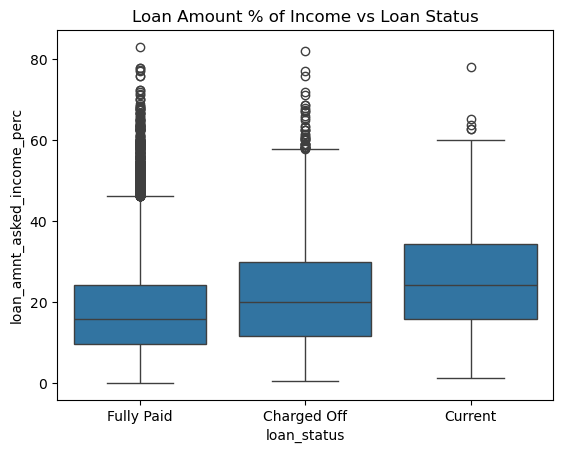

In [199]:
df['loan_amnt_asked_income_perc'] = (df['loan_amnt']*100)/df['annual_inc']

sns.boxplot(x='loan_status', y='loan_amnt_asked_income_perc', data=df)
plt.title('Loan Amount % of Income vs Loan Status')
plt.show()

### We can see that the fully paid loans are the ones with lesser loan amount per income percentage. Loans with default status are with higher percentage. This is also justified by below violin plot 


<Axes: xlabel='loan_status', ylabel='loan_amnt_asked_income_perc'>

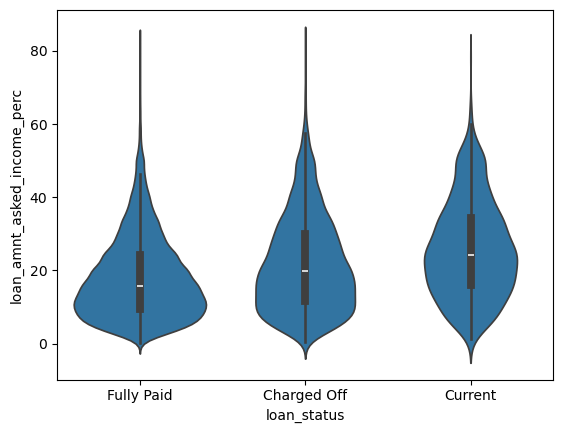

In [202]:
sns.violinplot(x='loan_status', y='loan_amnt_asked_income_perc', data=df)

Text(0.5, 1.0, 'Distribution of Loan Amount % of Income by Loan Status')

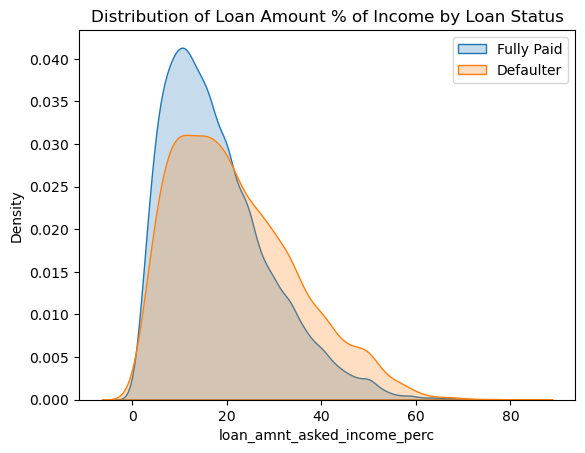

In [203]:
sns.kdeplot(df[df['loan_status']=='Fully Paid']['loan_amnt_asked_income_perc'], label='Fully Paid', shade=True)
sns.kdeplot(df[df['loan_status']=='Charged Off']['loan_amnt_asked_income_perc'], label='Defaulter', shade=True)
plt.legend()
plt.title('Distribution of Loan Amount % of Income by Loan Status')


### From the above charts, the following are observed : 
#### i) Loan applicants asking for upto ~25 percent of their income are likely to pay off their debt
#### ii) Once loan applicants apply for loan that is more than ~25 percent percentage of income, they are more likely to default than pay off



### Another feature that can have impact is revolving balance as percentage of income . Let's check this out 

In [207]:
df['revol_bal_income_perc'] = (df['revol_bal']*100)/df['annual_inc']

Text(0.5, 1.0, 'Distribution of Revolving Balance % of Income by Loan Status')

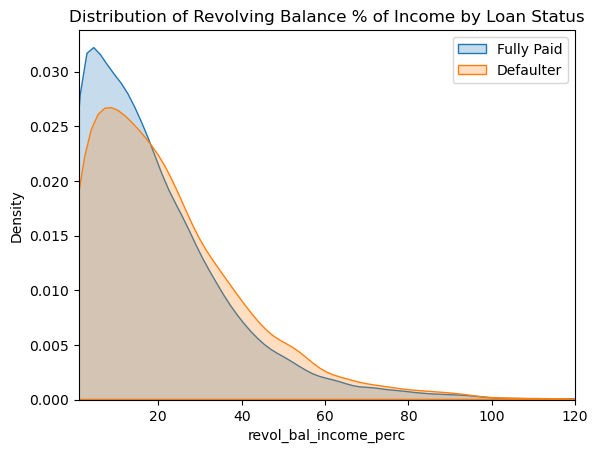

In [208]:
sns.kdeplot(df[df['loan_status']=='Fully Paid']['revol_bal_income_perc'], label='Fully Paid', shade=True)
sns.kdeplot(df[df['loan_status']=='Charged Off']['revol_bal_income_perc'], label='Defaulter', shade=True)
plt.xlim(1, 120)
plt.legend()
plt.title('Distribution of Revolving Balance % of Income by Loan Status')

### From the above we interpret that customers with revolving balance not more than 20 percent of their income are more likely to pay off the loan

### Lets segregate the data into Fully Paid , Charged off to understand the dynamics into each of these categories 

In [213]:
df_paid_off = df[df['loan_status'] == 'Fully Paid']
df_charged_off = df[df['loan_status'] == 'Charged Off']

In [214]:
df_paid_off.head(10)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,pub_rec_bankruptcies,diff_given_perc,loan_amnt_asked_income_perc,revol_bal_income_perc
0,5000,5000,4975.0,36,10.0,162.87,B,B2,10,RENT,24000.0,Verified,2011-12-01,Fully Paid,AZ,27.65,0,1985-01-01,1,3,0,13648,83.7,9,0.0,0.0,5863.16,5833.84,5000.00,863.16,0.00,0.0,0.0,2015-01-01,171.62,NaT,2016-05-01,0.0,0.0,20.833333,56.866667
2,2400,2400,2400.0,36,15.0,84.33,C,C5,10,RENT,12252.0,Not Verified,2011-12-01,Fully Paid,IL,8.72,0,2001-11-01,2,2,0,2956,98.5,10,0.0,0.0,3005.67,3005.67,2400.00,605.67,0.00,0.0,0.0,2014-06-01,649.91,NaT,2016-05-01,0.0,0.0,19.588639,24.126673
3,10000,10000,10000.0,36,13.0,339.31,C,C1,10,RENT,49200.0,Source Verified,2011-12-01,Fully Paid,CA,20.00,0,1996-02-01,1,10,0,5598,21.0,37,0.0,0.0,12231.89,12231.89,10000.00,2214.92,16.97,0.0,0.0,2015-01-01,357.48,NaT,2016-04-01,0.0,0.0,20.325203,11.378049
5,5000,5000,5000.0,36,7.0,156.46,A,A4,3,RENT,36000.0,Source Verified,2011-12-01,Fully Paid,AZ,11.20,0,2004-11-01,3,9,0,7963,28.3,12,0.0,0.0,5632.21,5632.21,5000.00,632.21,0.00,0.0,0.0,2015-01-01,161.03,NaT,2016-01-01,0.0,0.0,13.888889,22.119444
6,7000,7000,7000.0,60,15.0,170.08,C,C5,8,RENT,47004.0,Not Verified,2011-12-01,Fully Paid,NC,23.51,0,2005-07-01,1,7,0,17726,85.6,11,0.0,0.0,10110.84,10110.84,6985.61,3125.23,0.00,0.0,0.0,2016-05-01,1313.76,NaT,2016-05-01,0.0,0.0,14.892350,37.711684
7,3000,3000,3000.0,36,18.0,109.43,E,E1,9,RENT,48000.0,Source Verified,2011-12-01,Fully Paid,CA,5.35,0,2007-01-01,2,4,0,8221,87.5,4,0.0,0.0,3939.14,3939.14,3000.00,939.14,0.00,0.0,0.0,2015-01-01,111.34,NaT,2014-12-01,0.0,0.0,6.250000,17.127083
10,6500,6500,6500.0,60,14.0,153.45,C,C3,5,OWN,72000.0,Not Verified,2011-12-01,Fully Paid,AZ,16.12,0,1998-01-01,2,14,0,4032,20.6,23,0.0,0.0,7678.02,7678.02,6500.00,1178.02,0.00,0.0,0.0,2013-06-01,1655.54,NaT,2015-12-01,0.0,0.0,9.027778,5.600000
11,12000,12000,12000.0,36,12.0,402.54,B,B5,10,OWN,75000.0,Source Verified,2011-12-01,Fully Paid,CA,10.78,0,1989-10-01,0,12,0,23336,67.1,34,0.0,0.0,13947.99,13947.99,12000.00,1947.99,0.00,0.0,0.0,2013-09-01,6315.30,NaT,2013-08-01,0.0,0.0,16.000000,31.114667
13,3000,3000,3000.0,36,9.0,96.68,B,B1,3,RENT,15000.0,Source Verified,2011-12-01,Fully Paid,IL,12.56,0,2003-07-01,2,11,0,7323,43.1,11,0.0,0.0,3480.27,3480.27,3000.00,480.27,0.00,0.0,0.0,2015-01-01,102.43,NaT,2016-05-01,0.0,0.0,20.000000,48.820000
15,1000,1000,1000.0,36,16.0,35.31,D,D1,1,RENT,28000.0,Not Verified,2011-12-01,Fully Paid,MO,20.31,0,2007-09-01,1,11,0,6524,81.5,23,0.0,0.0,1270.72,1270.72,1000.00,270.72,0.00,0.0,0.0,2015-01-01,36.32,NaT,2016-05-01,0.0,0.0,3.571429,23.300000


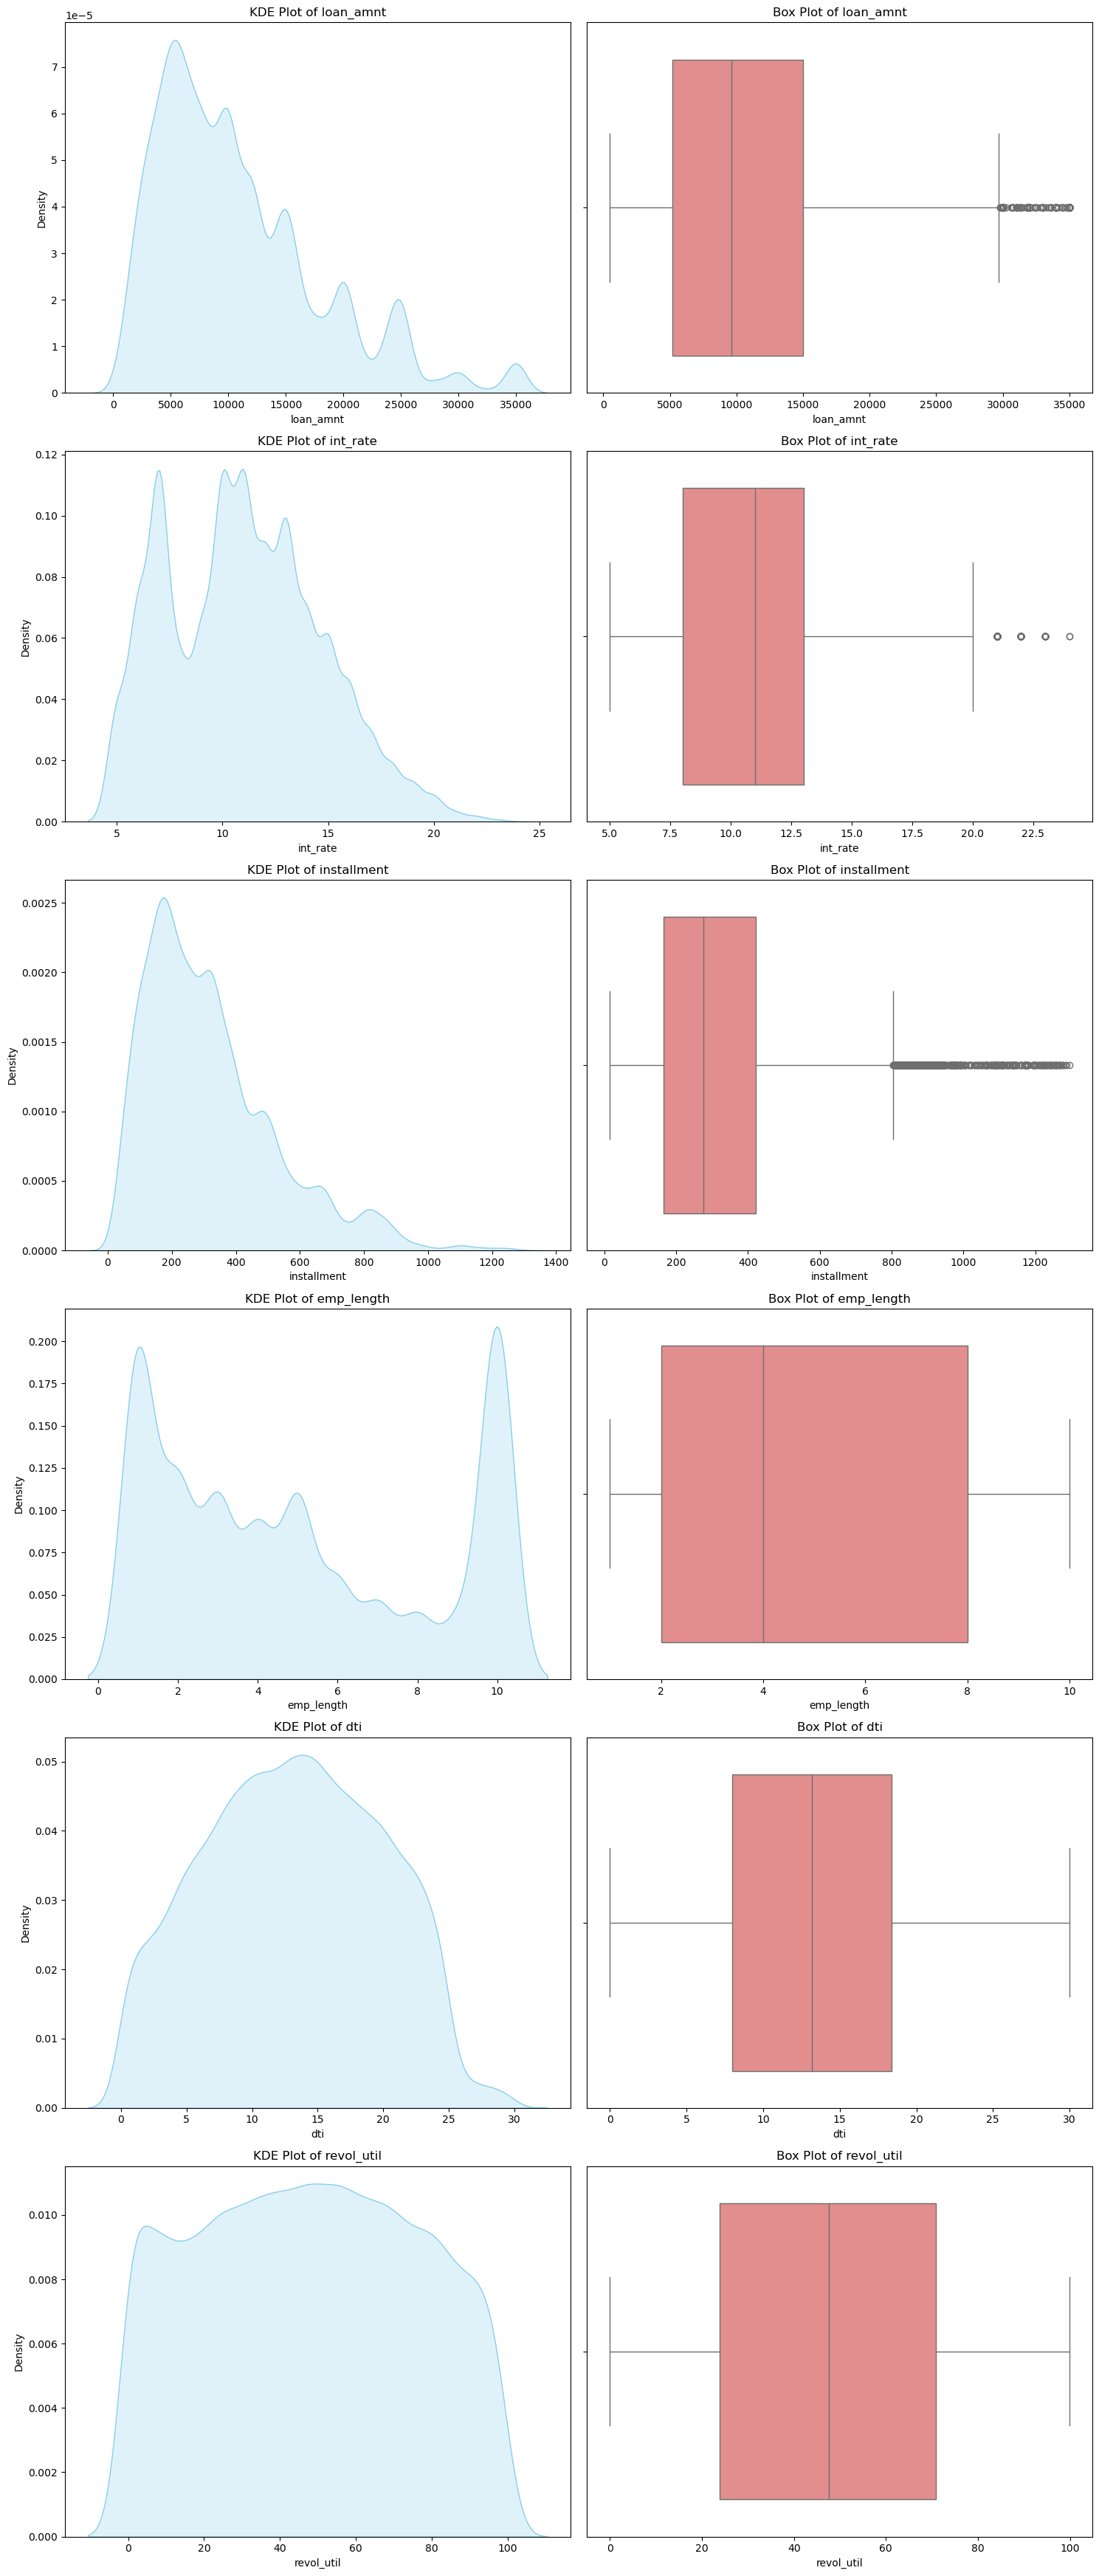

In [215]:


features = ['loan_amnt', 'int_rate', 'installment', 'emp_length', 'dti', 'revol_util']

# Create a grid of 6 rows and 2 columns (KDE and Box plot side by side)
fig, axes = plt.subplots(nrows=6, ncols=2, figsize=(15, 35))

# Loop through each feature and create plots
for i, feature in enumerate(features):
    # KDE plot in the first column
    sns.kdeplot(df_paid_off[feature], ax=axes[i, 0], fill=True, color='skyblue')
    axes[i, 0].set_title(f'KDE Plot of {feature}')

    # Box plot in the second column
    sns.boxplot(x=df_paid_off[feature], ax=axes[i, 1], color='lightcoral')
    axes[i, 1].set_title(f'Box Plot of {feature}')

# Adjust layout to avoid overlapping
plt.tight_layout()
plt.show()


### Interpretation of KDE and Box Plot for Loan Amount (loan_amnt)
1. KDE Plot Interpretation (Left Chart)
Shape & Distribution:
The KDE plot shows that the loan amount is right-skewed, meaning most loan amounts are on the lower end, with fewer applicants opting for higher loan amounts.
The peak (mode) occurs around $5,000 - $10,000, indicating that the majority of loans are within this range.
There are multiple smaller peaks, suggesting that loan amounts might be offered in standard increments (e.g., $5,000, $10,000, etc.).
The density tapers off beyond $30,000, indicating fewer loans at higher amounts.
2. Box Plot Interpretation (Right Chart)
Central Tendency:

The median loan amount (central line inside the box) is around $12,000, meaning 50% of loans are below this value.
The interquartile range (IQR) spans from around $5,000 to $15,000, indicating that the middle 50% of loan amounts lie within this range.
Outliers:

There are several outliers beyond $30,000, which suggests that some applicants are taking significantly higher loan amounts compared to the majority.
The whiskers extend to approximately $0 - $30,000, meaning most loan amounts fall within this range, but anything beyond is considered an outlier.
Key Insights and Actionable Observations
Common Loan Range:

Most loans are taken within the $5,000 to $15,000 range, indicating that this is the most preferred loan segment.
Outliers Impact:

The presence of outliers beyond $30,000 could indicate higher credit risk or specific business-related loans that need further investigation.
Consider focusing on loan approvals within the typical range to minimize risk exposure.
Right-Skewed Nature:

Since the distribution is skewed, it might be useful to analyze the relationship between loan amounts and default rates to check if higher amounts pose a higher risk.


### Interpretation of Interest Rate (int_rate) KDE and Box Plot
1. KDE Plot (Left Chart)
Distribution Shape:
The interest rates are right-skewed, with most loans concentrated between 7% to 15%, indicating common interest rate offerings.
Multiple peaks suggest distinct interest rate segments, possibly reflecting different risk categories.
The density declines beyond 15%, showing fewer high-interest loans.
2. Box Plot (Right Chart)
Central Tendency & Spread:
The median interest rate is around 11-12%, with the middle 50% (IQR) ranging from 8% to 14%.
A few outliers are present above 20%, indicating riskier loan profiles with higher interest rates.
Key Insights:
Most loans have interest rates between 7% to 15%, reflecting typical lending rates.
Higher interest rates (>20%) might correlate with higher risk and potential defaults.
Further analysis should explore the relationship between interest rate and loan default status.

### Interpretation of Installment (installment) KDE and Box Plot
1. KDE Plot (Left Chart)
   
Distribution Shape:
The installment amounts show a right-skewed distribution, with most values concentrated between $100 to $500.
The highest density is around $200, indicating that most borrowers have manageable monthly payments.
A long tail suggests that some loans have significantly higher installment amounts, albeit less common.

2. Box Plot (Right Chart)
Central Tendency & Spread:
The median installment amount is around $350-$400, with the middle 50% (IQR) ranging from $150 to $600.
Outliers are present beyond $800, indicating loans with higher monthly commitments.

Key Insights:

Most borrowers have monthly installments below $500, suggesting typical repayment capacity.
High installment amounts (outliers) might be associated with larger loans and could increase default risk.

### Interpretation of Installment(employment) KDE and Box Plot

1. KDE Plot (Left Chart)
The employment length distribution shows a bimodal pattern with two prominent peaks. The first major peak occurs around 1 year of employment, and the second peak appears around 10 years. The distribution shows several smaller peaks between these two extremes, suggesting distinct clusters of employee tenure. The density gradually decreases between years 2-8, with some minor fluctuations.

2. Box Plot (Right Chart)
Central Tendency & Spread: The median employment length appears to be around 5-6 years, with the middle 50% (IQR) ranging approximately from 3 to 7 years. The box plot shows relatively symmetric distribution around the median. The whiskers extend from about 2 to 8 years, suggesting this is the typical range of employment lengths in the dataset.

#### Key Insights:

There's a significant concentration of employees with very short tenure (1-2 years), possibly indicating either new workforce entrants or job mobility
The second peak at 10 years suggests a substantial group of long-term, stable employees
The relatively even distribution between these peaks indicates steady career progression patterns
The box plot shows few outliers, suggesting that most employment lengths fall within expected ranges
The bimodal distribution might reflect different workforce segments: newer employees still building their careers and established professionals with longer tenure


### Interpretation of Installment(debt-to-income ratio) KDE and Box Plot

KDE Plot (Left Chart):
The distribution is roughly bell-shaped but slightly right-skewed, with peak density around 15-17%. The spread extends from about 0% to 30%, with a gradual tail-off at higher ratios. This suggests most borrowers have moderate debt loads relative to their income.
    
Box Plot (Right Chart):
The median DTI is approximately 15%, with the interquartile range spanning roughly 10-20%. There are some outliers extending to around 30%, representing borrowers with higher debt burdens.

#### Key Insights:

Most borrowers maintain DTI ratios between 10-20%
The relatively symmetric distribution suggests a typical, manageable debt burden for the majority
Outliers above 25% may represent higher-risk borrowers with substantial debt obligations

### Interpretation of Installment(debt-to-income ratio) KDE and Box Plot

KDE Plot (Left):
Shows a fairly uniform distribution across utilization rates from 0-100%, with slightly higher density between 40-70%. There's a small peak around 10% utilization.

Box Plot (Right):
Median utilization is around 45%, with the interquartile range spanning roughly 25-65%. There are outliers at both very low and very high utilization rates.

#### Key Insights:

Wide spread of utilization rates suggests diverse credit usage patterns
Most borrowers use between a quarter to two-thirds of their available credit
Even distribution indicates no strong preference for particular utilization levels




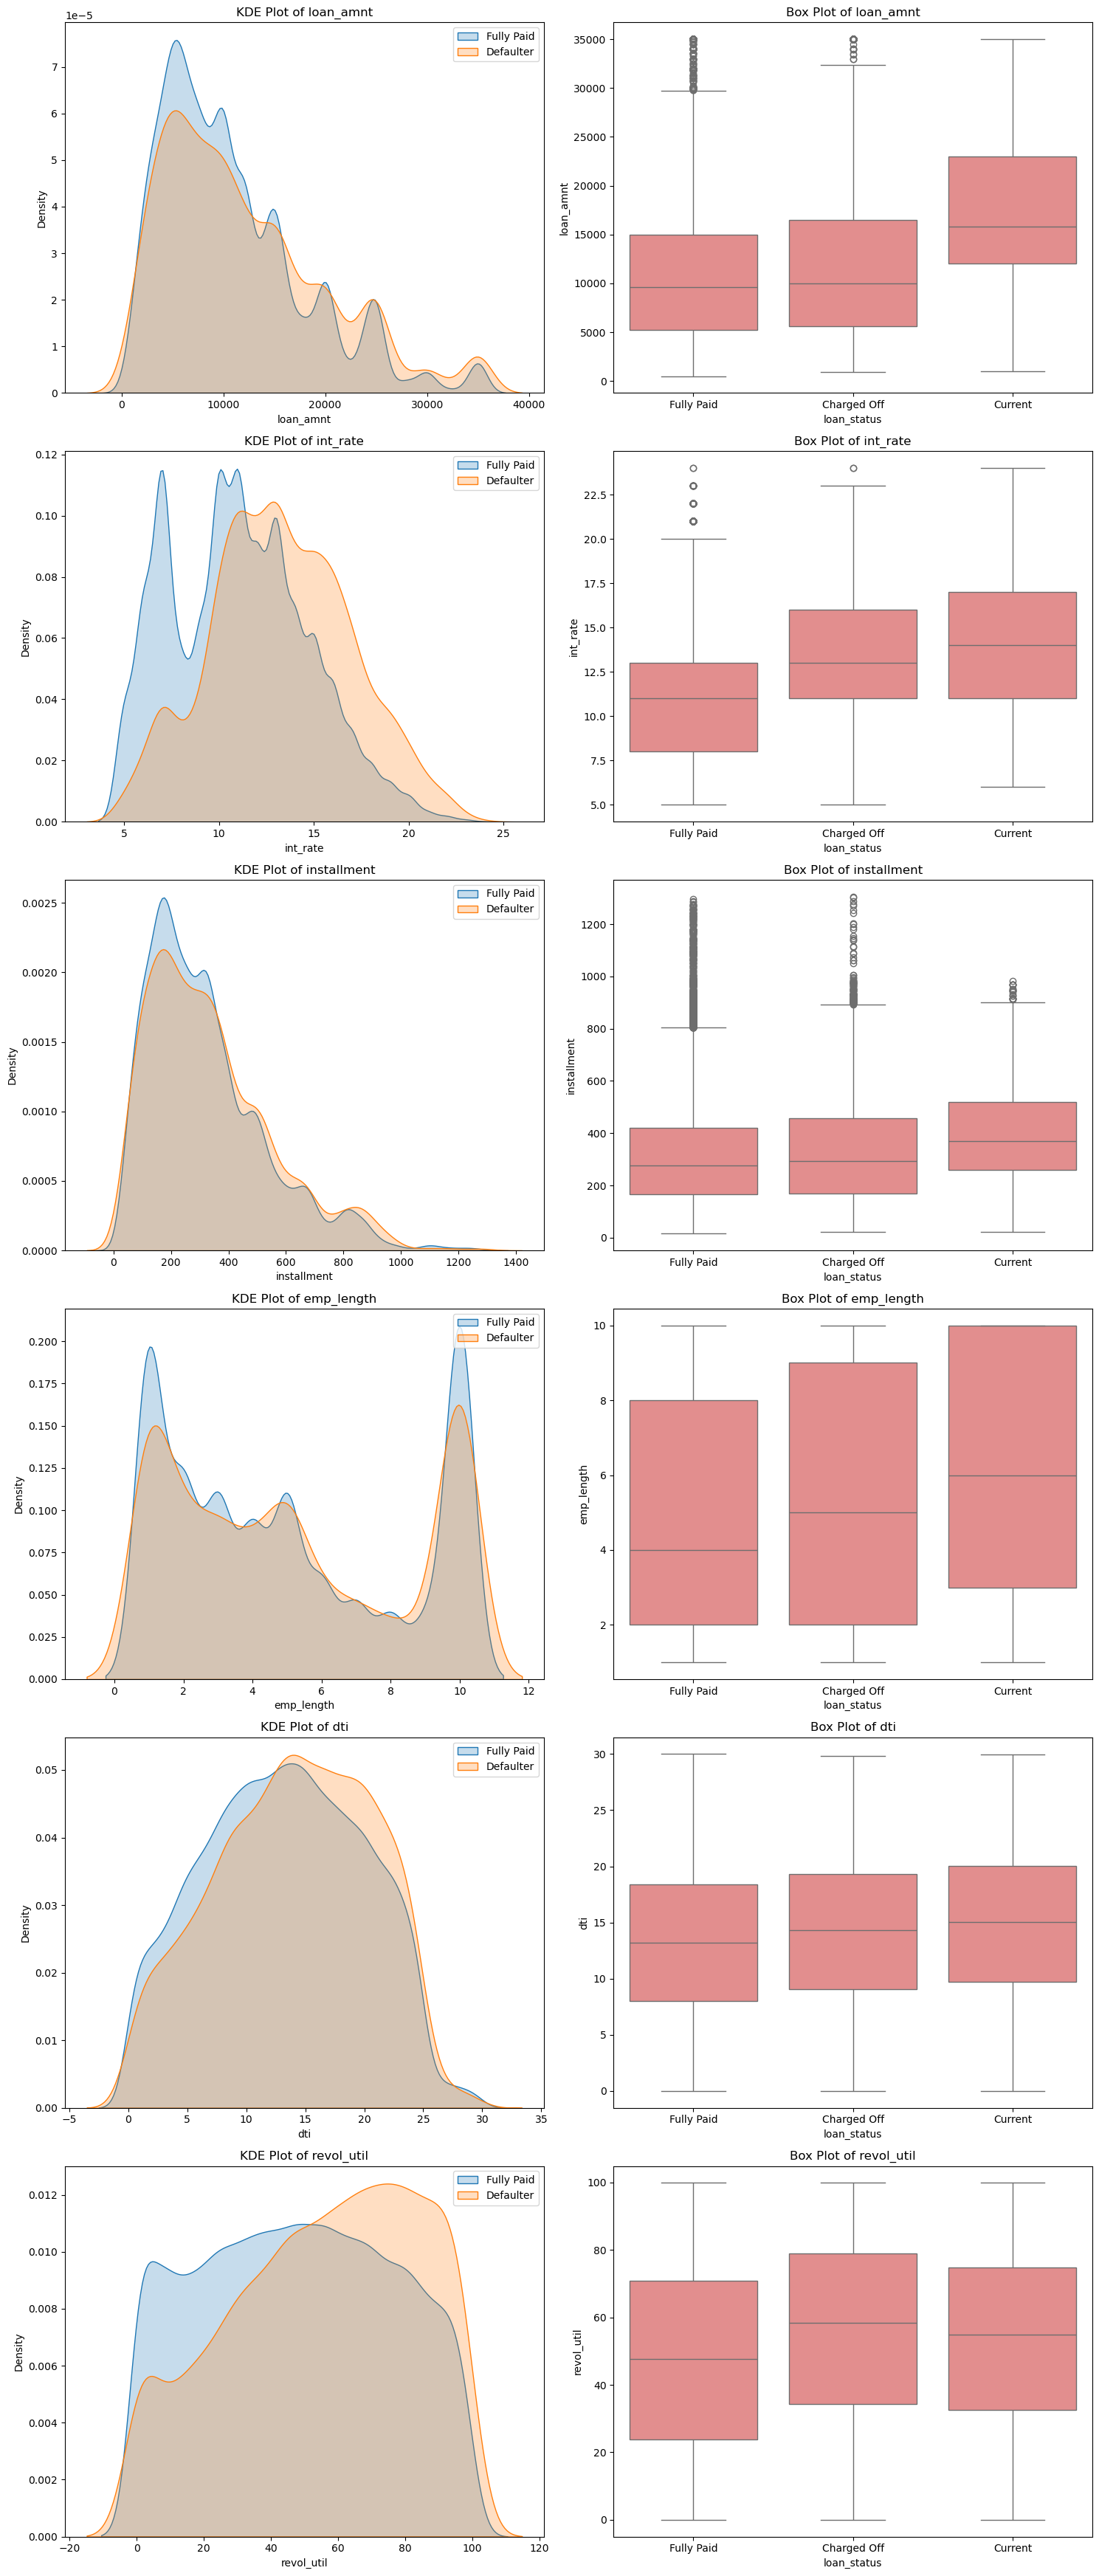

In [246]:
features = ['loan_amnt', 'int_rate', 'installment', 'emp_length', 'dti', 'revol_util']  # Features for plotting

# Create a grid of 6 rows and 2 columns (KDE and Box plot side by side)
fig, axes = plt.subplots(nrows=6, ncols=2, figsize=(15, 35))  

for i, feature in enumerate(features):  
    # KDE plot in the first column
    sns.kdeplot(df[df['loan_status'] == 'Fully Paid'][feature], ax=axes[i, 0], label='Fully Paid', shade=True)
    sns.kdeplot(df[df['loan_status'] == 'Charged Off'][feature], ax=axes[i, 0], label='Defaulter', shade=True)
    axes[i, 0].set_title(f'KDE Plot of {feature}')
    axes[i, 0].legend()  # Add legend to KDE plot
    
    # Box plot in the second column
    sns.boxplot(x='loan_status', y=feature, ax=axes[i, 1], color='lightcoral', data=df)
    axes[i, 1].set_title(f'Box Plot of {feature}')

# Adjust layout to avoid overlapping
plt.tight_layout()
plt.show()


### **Parameter - Loan Amount**
### **Insights from KDE Plot (Left Chart):**  
1. **For Fully Paid Loans:**  
   - Fully paid loans are more concentrated around lower loan amounts (around $10,000), indicating that smaller loans have a higher likelihood of being successfully repaid.  
   
2. **For Defaults:**  
   - Defaulted loans tend to have a relatively higher proportion in the mid-range amounts ($15,000 - $25,000), suggesting that larger loan sizes might increase the risk of default.  

---

### **Insights from Box Plot (Right art):**  
1. **For Fully Paid Loans:**  
   - Fully paid loans have a lower median loan amount compared to defaults, with fewer outliers, indicating that managing smaller loans is easier for borrowers.  

2. **For Defaults:**  
   - Defaulted loans (charged off) exhibit a wider spread with more high-value outliers, suggesting that higher loan amounts contribute to repayment difficulties and an increased risk  further analysis!

### **Parameter - Interest Rate**
### **Insights from KDE Plot (Left Chart):**   <interest rate>
1. **For Fully Paid Loans:**  
   - Fully paid loans are more concentrated in the lower interest rate range (5% to 10%), indicating that borrowers with lower interest rates are more likely to successfully repay their loans.  
   
2. **For Defaults:**  
   - Defaulted loans are more prevalent at higher interest rates (above 15%), suggesting that loans with higher interest rates pose a higher risk of default.

---

### **Insights from Box Plot (Right Chart):** <interest rate>
1. **For Fully Paid Loans:**  
   - The median interest rate for fully paid loans is lower compared to defaults, and the overall range of interest rates is narrower, indicating that lower interest rates contribute to successful repayments.  

2. **For Defaults:**  
   - Defaulted loans (charged off) have a higher median interest rate with a wider spread and more outliers, suggesting that borrowers with high interest rates face greater financial burden and are more prone to default.  





### **Parameter - Installment**  
### **Insights from KDE Plot (Left Chart):**  
1. **For Fully Paid Loans:**  
   - The density curve for fully paid loans shows a peak around lower installment values (approximately $200), indicating that borrowers with smaller installment amounts are more likely to complete their payments successfully.  
   
2. **For Defaults:**  
   - Defaulted loans follow a similar distribution but with a slightly lower peak, suggesting that defaults occur across a broader range of installment values, especially in the mid-range.  
   
---

### **Insights from Box Plot (Right Chart):**  
1. **For Fully Paid Loans:**  
   - The median installment amount for fully paid loans is lower compared to defaulted and current loans. There are fewer high-value outliers, indicating that manageable installment amounts contribute to successful loan repayment.  

2. **For Defaults:**  
   - Defaulted loans (charged off) show a wider distribution with numerous high-value outliers, suggesting that higher installment amounts might contribute to repayment challenges and an increased  adjustments are needed!

### **Parameter - Employment Length**  
### **Insights from KDE Plot (Left Chart):**  
1. **For Fully Paid Loans:**  
   - Fully paid loans have two peaks, one at 0 years and another at 10 years of employment length, indicating that borrowers with either very short or very long employment tenure are more likely to repay successfully.  
   
2. **For Defaults:**  
   - Defaulted loans follow a similar pattern but with slightly higher density in the mid-range (2 to 6 years), suggesting that borrowers with moderate employment experience may have higher default risks.  
   
---

### **Insights from Box Plot (Right Chart):**  
1. **For Fully Paid Loans:**  
   - The median employment length for fully paid loans is lower compared to defaults, with a more concentrated distribution, indicating that borrowers with shorter employment tenure are more likely to repay successfully.  

2. **For Defaults:**  
   - Charged-off loans show a wider interquartile range, implying that individuals with varied employment tenures (both short and long) face challenges in repayment. This category also has a higher median employment length, suggesting that longer employment does not always guarantee successful repayment.  


### **Parameter - Debt-to-Income (DTI) Ratio**  
### **Insights from KDE Plot (Left Chart):**  
1. **For Fully Paid Loans:**  
   - The density curve for fully paid loans peaks around a DTI of 15, suggesting that borrowers with moderate debt-to-income ratios are more likely to repay their loans successfully.  
   - The distribution skews slightly to the left compared to defaulters, indicating that lower DTI values are more common among fully paid loans.  
   
2. **For Defaults:**  
   - Defaulted loans show a similar peak around a DTI of 15 but with a slightly longer right tail, implying that higher DTI values are more associated with default risk.  
   - The overall distribution suggests that borrowers with DTIs above 20 face increased repayment challenges.  

---

### **Insights from Box Plot (Right Chart):**  
1. **For Fully Paid Loans:**  
   - Fully paid loans have a slightly lower median DTI compared to defaulted loans, indicating that borrowers with lower debt burdens relative to income are more successful in repayments.  

2. **For Defaults:**  
   - Charged-off loans exhibit a similar interquartile range to fully paid loans but with a slightly higher median, suggesting that higher DTI levels correlate with increased default risk.  
   - The presence of high DTI values in the upper range could indicate financial stress leading to loan defaults.  



### Parameter - Revolving Utilization 

### **Insights from KDE Plot (Left Chart):**  
1. **For Fully Paid Loans:**  
   - Fully paid loans show a higher density around lower revol_util values (below 50%), suggesting that borrowers with lower credit utilization are more likely to repay successfully.  

2. **For Defaults:**  
   - Defaulted loans exhibit a greater density at higher revol_util values (60% and above), indicating that higher credit utilization increases the risk of default.  

---

### **Insights from Box Plot (Right Chart):**  
1. **For Fully Paid Loans:**  
   - Fully paid loans have a lower median revol_util value compared to defaults, with less variability, indicating that borrowers with lower and more consistent credit utilization are more likely to repay.  

2. **For Defaults:**  
   - Defaulted loans (charged off) show a higher median revol_util and a wider interquartile range, suggesting that higher and more varied credit utilization may lead to repayment difficulties and an increased risk of default.  


### Now checking for categorical variables 

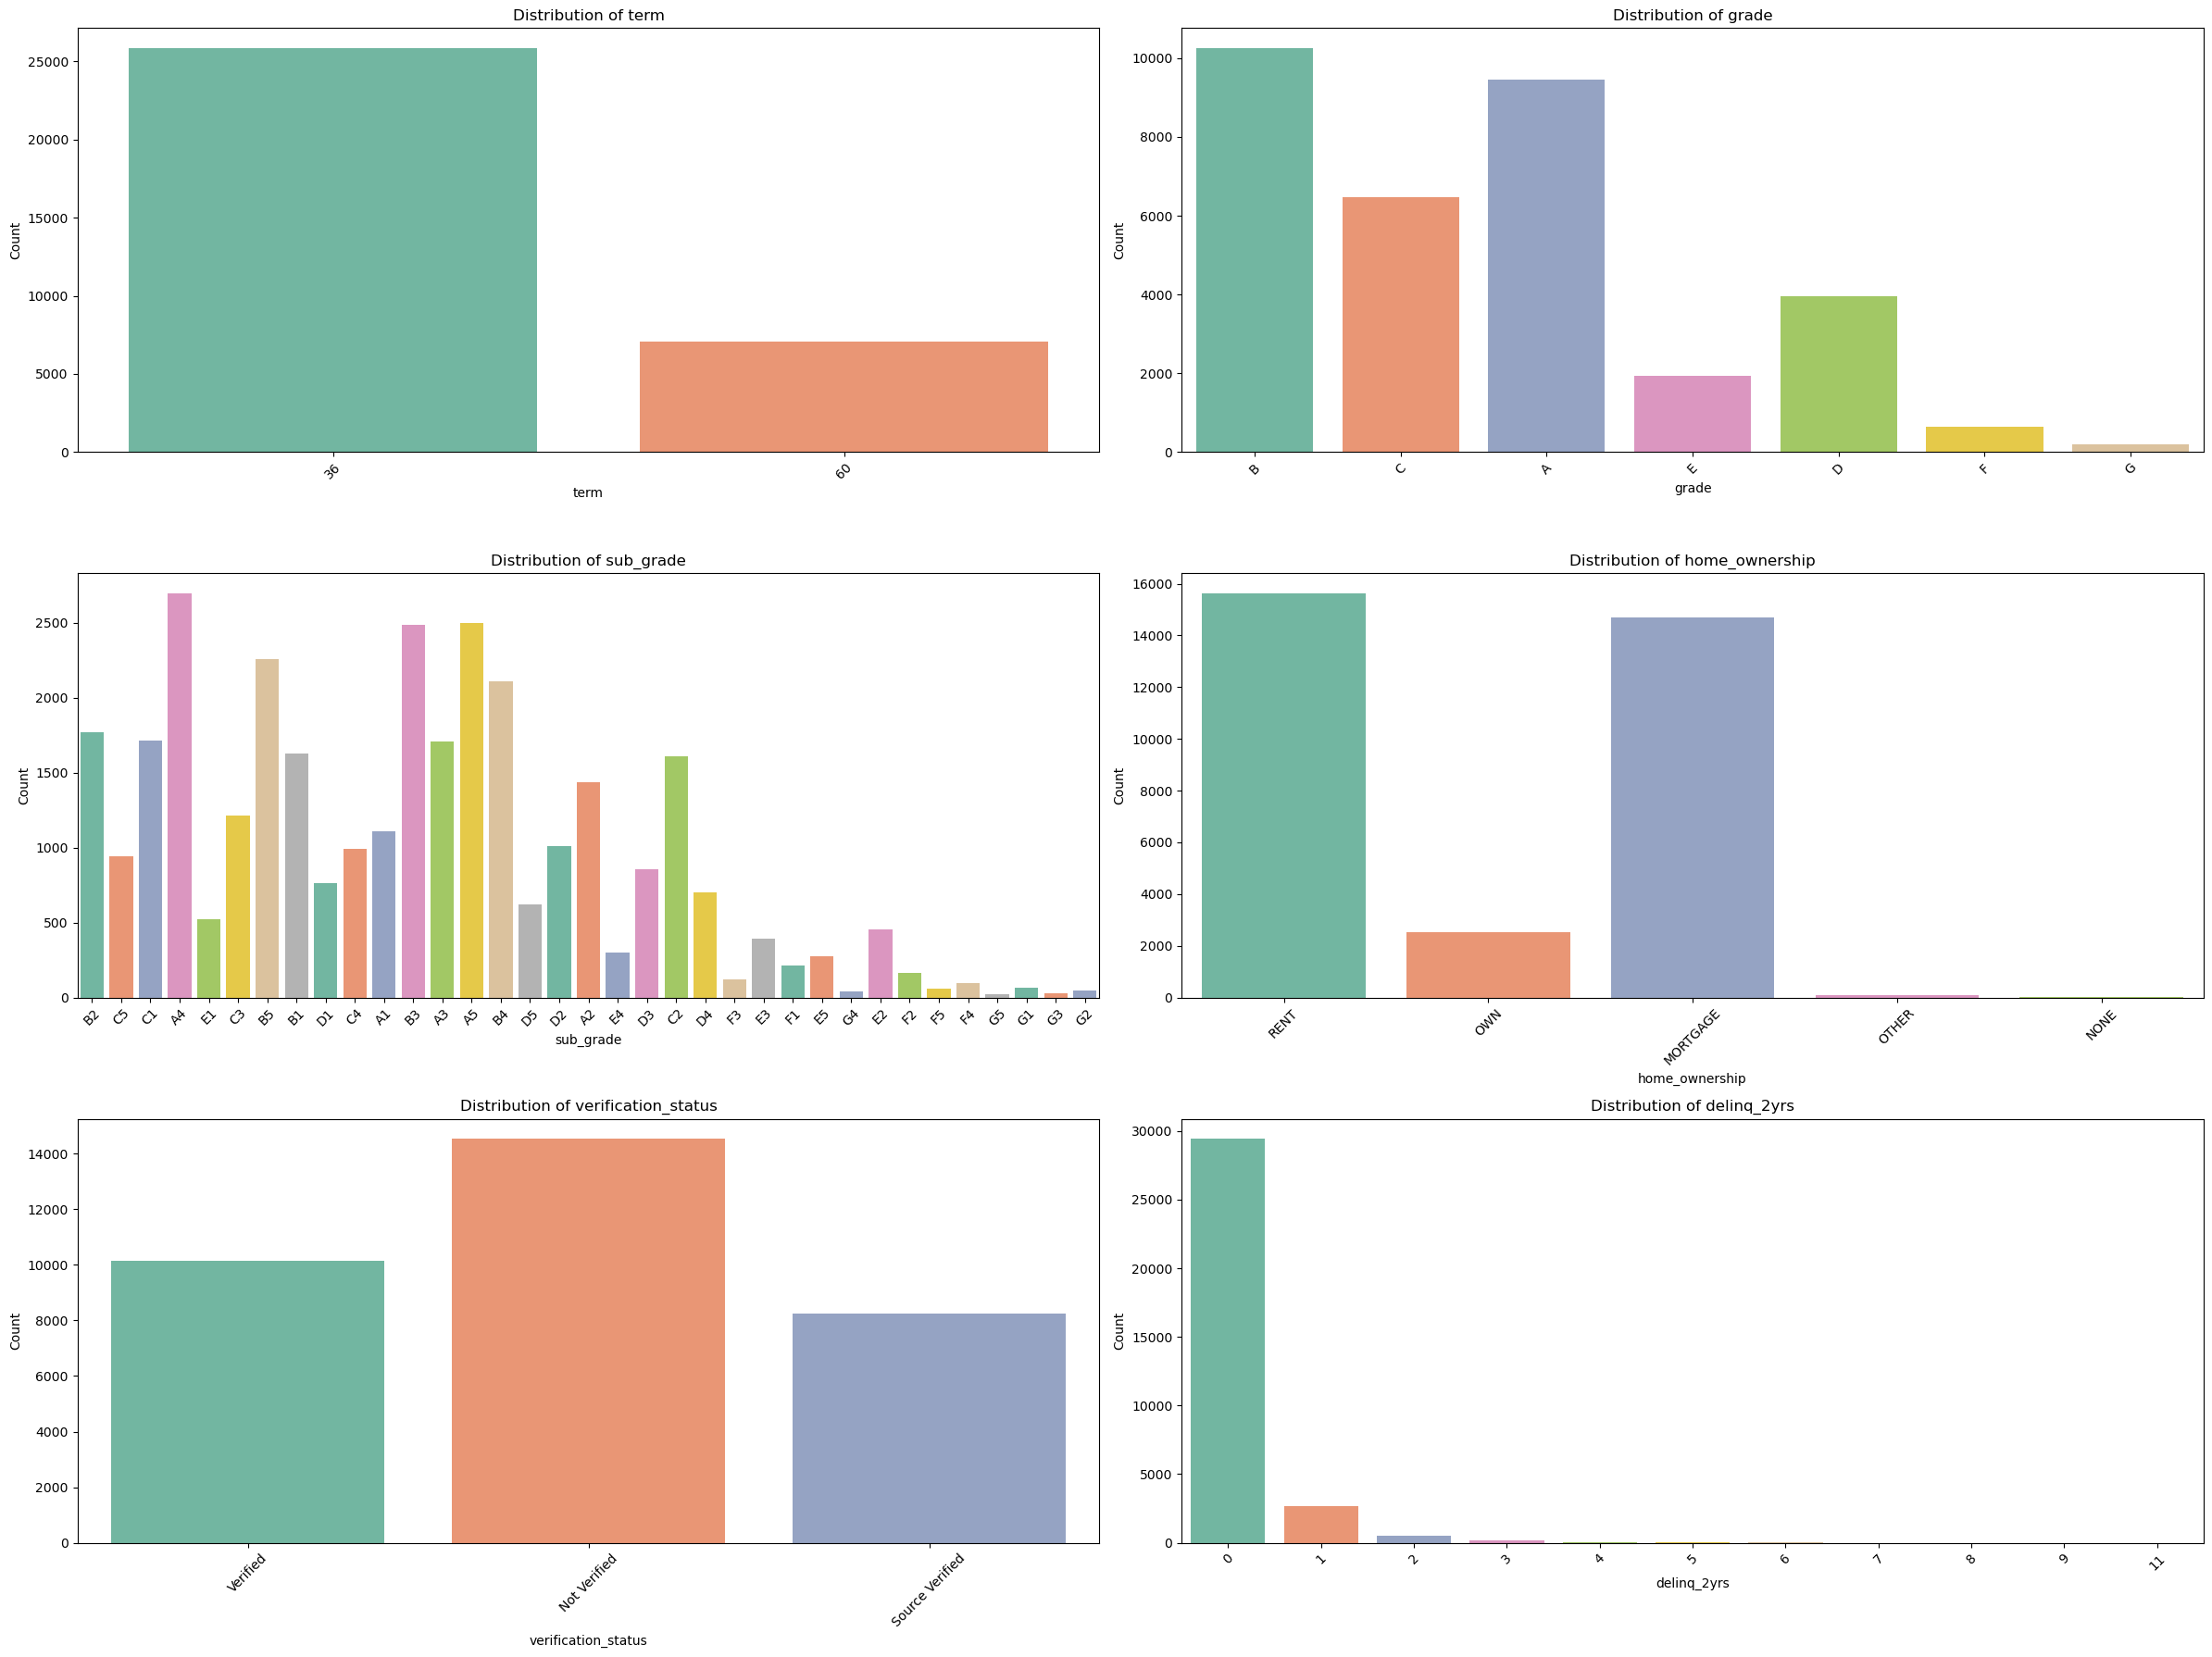

In [248]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter data to exclude 'Current' loan status
filtered_df = df[df['loan_status'].isin(['Fully Paid'])]

# Define color palette for selected categories
"""palette = {
    'Fully Paid': 'skyblue', 
    'Charged Off': 'salmon'
}"""

# List of categorical features
cat_features = [
    "term",
    "grade",
    "sub_grade",
    "home_ownership",
    "verification_status",
    "delinq_2yrs",
]

# Create subplots with 2 rows and 3 columns
fig, axes = plt.subplots(3, 2, figsize=(24, 18))
axes = axes.flatten()  # Flatten the 2D axes array for easier iteration

# Loop through categorical features and create count plots
for idx, feature in enumerate(cat_features):
    sns.countplot(
        data=filtered_df, 
        x=feature, 
        #hue='loan_status',  
        ax=axes[idx], 
        palette='Set2'
    )
    
    axes[idx].set_title(f'Distribution of {feature}')
    axes[idx].set_xlabel(feature)
    axes[idx].set_ylabel('Count')
    axes[idx].tick_params(axis='x', rotation=45)  # Rotate x labels for readability

# Adjust layout to prevent overlapping
plt.tight_layout()
plt.show()


### Analysis of Categorical variables for Fully Paid Loans 

 - Laons with 36 months term are much likely to be paid off fully
 - Loans with B, A , C are likely to be fully paid in the order mentioned
 - Loans with subgrade A4, B3, A5 are likely to be fully paid in the order mentioned
 - Loans with owner having Mortgage and Rent type property are more likely to pay their loans
 - Loans with 'Not Verified' status are still many more. The ones with Verified status are more compared to Source verified. Further multiple variable analysis will be done to see what is working for Not Verified types
 - Loans from states CA, NY, TX, FL are more likely to be fully paid

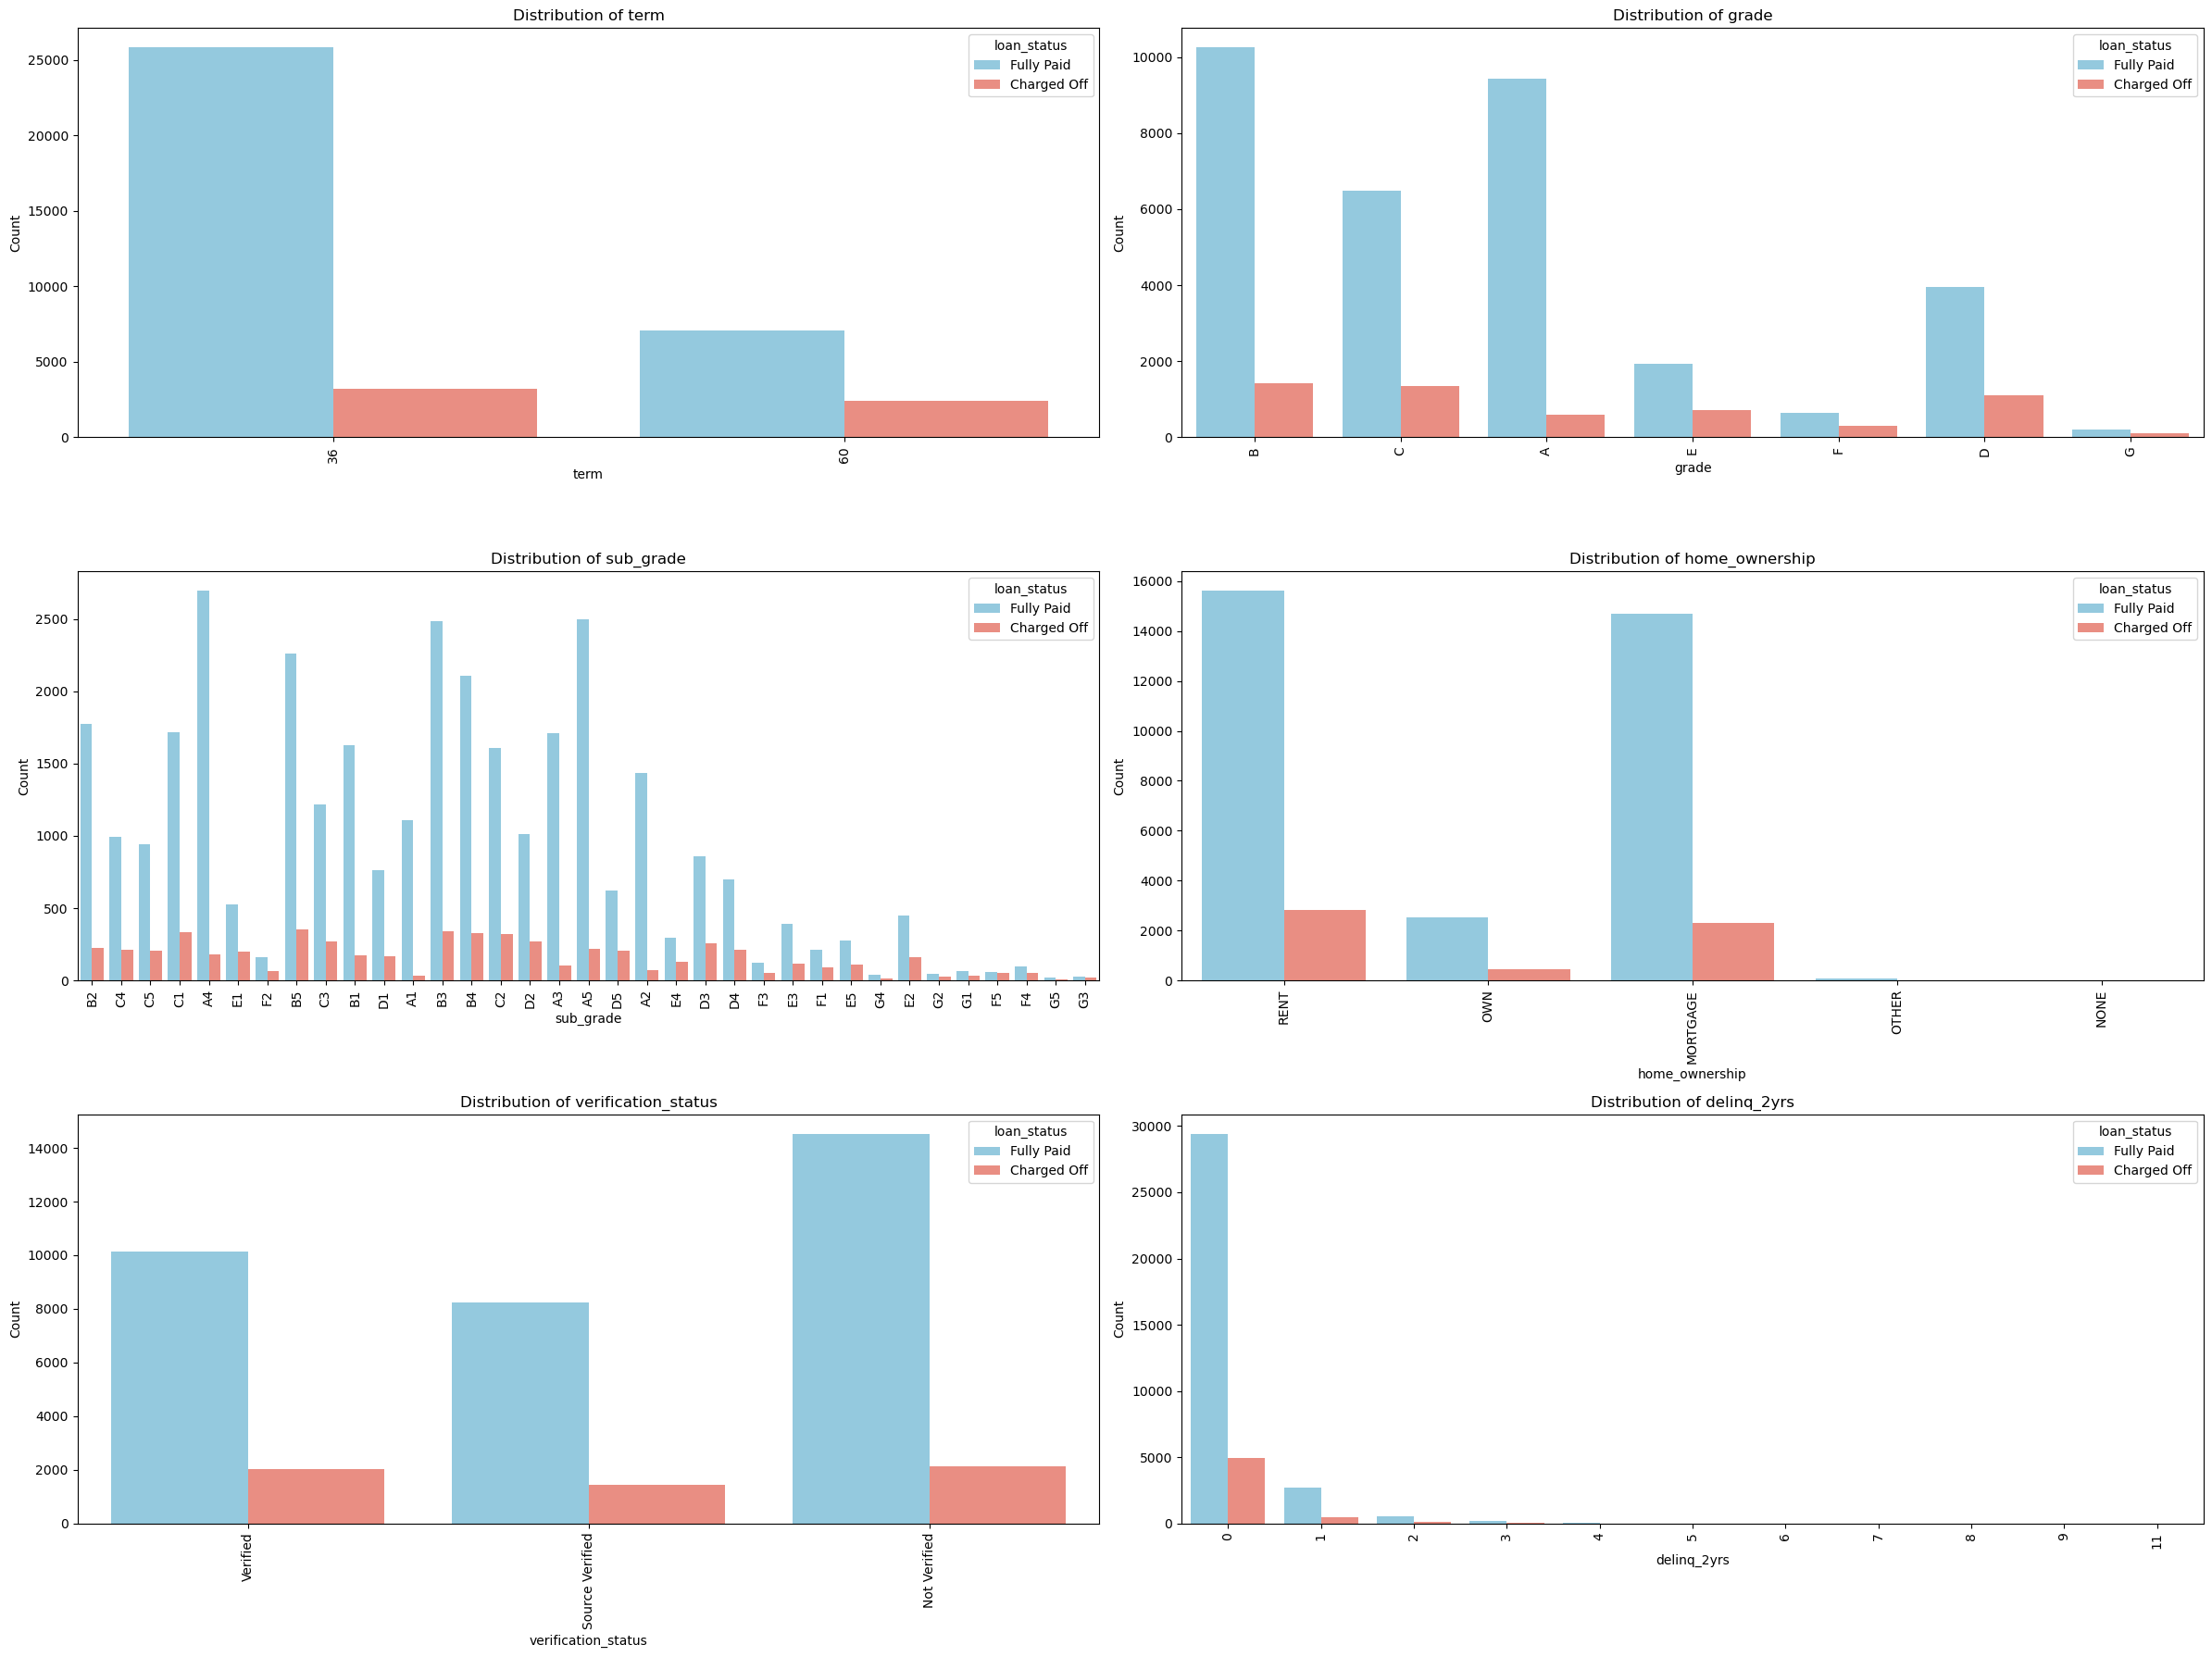

In [251]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter data to exclude 'Current' loan status
filtered_df = df[df['loan_status'].isin(['Charged Off','Fully Paid'])]

# Define color palette for selected categories
palette = {
    'Fully Paid': 'skyblue', 
    'Charged Off': 'salmon'
}

# List of categorical features
cat_features = [
    "term",
    "grade",
    "sub_grade",
    "home_ownership",
    "verification_status",
    "delinq_2yrs",
]

# Create subplots with 2 rows and 3 columns
fig, axes = plt.subplots(3, 2, figsize=(24, 18))
axes = axes.flatten()  # Flatten the 2D axes array for easier iteration

# Loop through categorical features and create count plots
for idx, feature in enumerate(cat_features):
    sns.countplot(
        data=filtered_df, 
        x=feature, 
        hue='loan_status',  
        ax=axes[idx], 
        palette= palette
    )
    
    axes[idx].set_title(f'Distribution of {feature}')
    axes[idx].set_xlabel(feature)
    axes[idx].set_ylabel('Count')
    axes[idx].tick_params(axis='x', rotation=90)  # Rotate x labels for readability

# Adjust layout to prevent overlapping
plt.tight_layout()
plt.show()


### Analysis of Categorical variables

#### Term (Loan Duration) Analysis:

#### 1. Fully Paid Loans:
Loans with a 36-month term have a significantly higher number of fully paid cases compared to 60-month loans, suggesting shorter loan terms might be more manageable for borrowers.

#### 2. Charged Off Loans:
While defaults occur in both 36-month and 60-month loans, 60-month loans have a relatively higher proportion of charged-off cases, indicating longer durations may pose higher risks.

#### Grade Analysis:

#### 1. Fully Paid Loans:
The majority of fully paid loans are concentrated in higher grades (A, B, C), indicating that loans of these grades are more likely to be paid successfully.

#### 2. Charged Off Loans:
Lower grades, particularly D and below, show a higher proportion of defaults, highlighting that loans of these grades are more likely to be charged off.

________________________________________________________________________________________________________________________________________________________

#### Sub-Grade Analysis : 


#### 1. Fully Paid Loans:

Borrowers with sub-grades in the A and B categories (e.g., A1, A3, B1, B3) have a significantly higher count of fully paid loans, indicating that these sub-grades are associated with lower risk.

As the sub-grade moves towards lower categories (e.g., D, E, F, G), the number of fully paid loans decreases

#### 2. Charged Off Loans:

Lower sub-grades such as E, F, and G have relatively higher proportions of defaults, indicating higher-risk borrowers.
Even within the B and C categories, there is a visible portion of defaults, suggesting that borrowers in these mid-tier grades still pose some level of risk.

#### Home Ownership Analysis:

### 1. Fully Paid Loans:

Borrowers who own homes or have mortgages have a higher count of fully paid loans, suggesting that having property ownership contributes to financial stability and better loan repayment rates.

Renters also have a large number of fully paid loans but in comparison, the proportion of charged-off loans is relatively higher.

### 2. Charged Off Loans:

Borrowers who have rented accomodatoin show a noticeably higher proportion of defaults compared to homeowners, indicating that lack of property ownership could be a potential risk factor for non-repayment.



### **Analysis of Verification Status and Delinquencies in Last 2 Years for Fully Paid vs. Charged Off Loans**

#### **1. Verification Status Analysis:**  
- **Fully Paid Loans:**  
  - The number of fully paid loans is highest for the "Not Verified" category, followed by "Verified" and "Source Verified," indicating that loans can still be repaid without strict verification in many cases.  
  - However, "Verified" loans also have a strong representation among fully paid loans, suggesting that verification may contribute to better loan repayment outcomes.  

- **Charged Off Loans:**  
  - Defaults are present across all verification statuses, but the proportion of defaults is higher in the "Not Verified" and "Source Verified" categories, indicating that lack of thorough verification may increase default risk.  
  - The "Verified" category shows relatively fewer defaults, highlighting that proper verification may help reduce credit risk.  

---

#### **2. Delinquencies in Last 2 Years (delinq_2yrs) Analysis:**  
- **Fully Paid Loans:**  
  - A vast majority of fully paid loans have **zero delinquencies**, indicating that borrowers with a clean repayment history are more likely to fulfill their loan obligations.  
  - As the number of delinquencies increases, the number of fully paid loans drops significantly, showing a strong correlation between past delinquencies and repayment success.  

- **Charged Off Loans:**  
  - A higher proportion of defaults is observed among borrowers with at least **one or more delinquencies**, reinforcing that past financial behavior is a strong predictor of loan default.  
  - Even at **zero delinquencies**, some defaults occur, but their proportion is relatively lower compared to those with delinquency history.

In [255]:
print(df['next_pymnt_d'].min())

2016-06-01 00:00:00


In [257]:
print(df['issue_d'].max())

2011-12-01 00:00:00


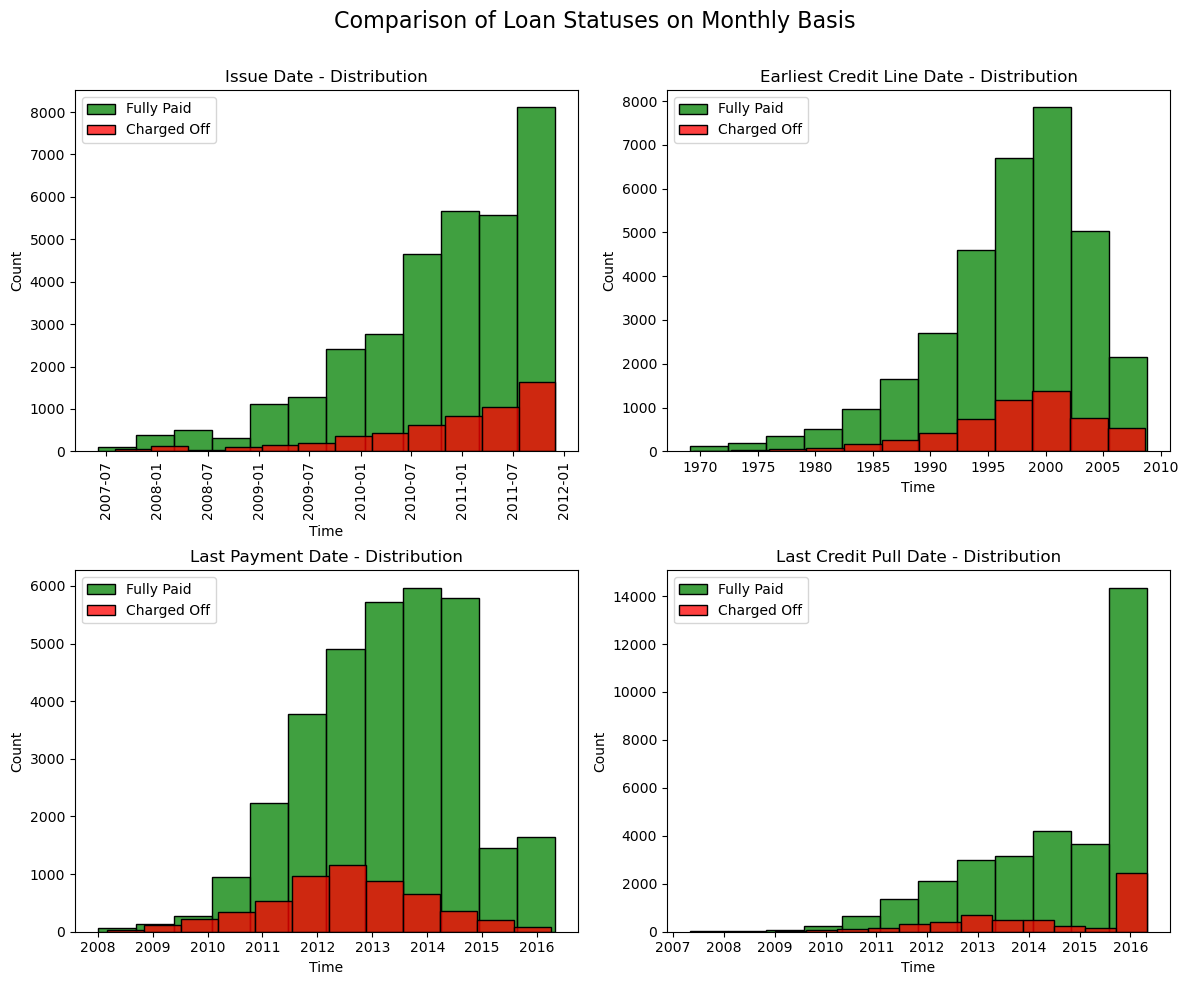

In [244]:

# Set up the plot grid
fig, axs = plt.subplots(2, 2, figsize=(12, 10))
fig.suptitle("Comparison of Loan Statuses on Monthly Basis", fontsize=16)

# Plot histograms for the different date columns
sns.histplot(data=df[df['loan_status']=='Fully Paid'], x='issue_d', kde=False, ax=axs[0, 0], color='green', label='Fully Paid', bins=12)
sns.histplot(data=df[df['loan_status']=='Charged Off'], x='issue_d', kde=False, ax=axs[0, 0], color='red', label='Charged Off', bins=12)

axs[0, 0].set_title('Issue Date - Distribution')
axs[0, 0].set_xlabel('Time')
axs[0, 0].set_ylabel('Count')
axs[0, 0].legend()
axs[0,0].tick_params(axis='x', rotation=90) 

sns.histplot(data=df[(df['loan_status'] == 'Fully Paid') & (df['earliest_cr_line'].dt.year < 2025)], 
             x='earliest_cr_line', kde=False, ax=axs[0, 1], color='green', label='Fully Paid', bins=12)

sns.histplot(data=df[(df['loan_status'] == 'Charged Off') & (df['earliest_cr_line'].dt.year < 2025)], 
             x='earliest_cr_line', kde=False, ax=axs[0, 1], color='red', label='Charged Off', bins=12)

axs[0, 1].set_title('Earliest Credit Line Date - Distribution')
axs[0, 1].set_xlabel('Time')
axs[0, 1].set_ylabel('Count')
axs[0, 1].legend()

sns.histplot(data=df[df['loan_status']=='Fully Paid'], x='last_pymnt_d', kde=False, ax=axs[1, 0], color='green', label='Fully Paid', bins=12)
sns.histplot(data=df[df['loan_status']=='Charged Off'], x='last_pymnt_d', kde=False, ax=axs[1, 0], color='red', label='Charged Off', bins=12)

axs[1, 0].set_title('Last Payment Date - Distribution')
axs[1, 0].set_xlabel('Time')
axs[1, 0].set_ylabel('Count')
axs[1, 0].legend()


sns.histplot(data=df[df['loan_status']=='Fully Paid'], x='last_credit_pull_d', kde=False, ax=axs[1, 1], color='green', label='Fully Paid', bins=12)
sns.histplot(data=df[df['loan_status']=='Charged Off'], x='last_credit_pull_d', kde=False, ax=axs[1, 1], color='red', label='Charged Off', bins=12)

axs[1, 1].set_title('Last Credit Pull Date - Distribution')
axs[1, 1].set_xlabel('Time')
axs[1, 1].set_ylabel('Count')
axs[1, 1].legend()


# Show the plot
plt.tight_layout()
plt.subplots_adjust(top=0.9)  # Adjust the top for the main title
plt.show()

### **Analysis of Issue Date and Earliest Credit Line Date for Fully Paid vs. Charged Off Loans**

#### **1. Issue Date - Distribution:**  
- **Fully Paid Loans:**  
  - The number of fully paid loans has steadily increased over time, peaking around 2011, which may indicate growth in the loan portfolio and potentially improved lending strategies.  
  - The trend suggests that more recent loans have a higher chance of being fully repaid, possibly due to better borrower screening or economic conditions.  

- **Charged Off Loans:**  
  - Charged off loans have also increased over time, though they represent a smaller proportion compared to fully paid loans.  
  - The rise in charged off loans in later years may indicate higher risk-taking or economic downturns affecting borrowers' ability to repay.  

---

#### **2. Earliest Credit Line Date - Distribution:**  
- **Fully Paid Loans:**  
  - Borrowers with earlier credit lines (from the 1980s and 1990s) have a higher number of fully paid loans, suggesting that individuals with longer credit histories are more reliable.  
  - Most fully paid loans are associated with credit lines established between 1995 and 2005, reflecting a matured credit history with potential financial stability.  

- **Charged Off Loans:**  
  - Defaults are more prevalent among borrowers with shorter credit histories (post-2000), indicating that limited credit experience might contribute to higher default rates.  
  - However, some defaults are observed even among borrowers with older credit lines, highlighting that a long credit history does not always guarantee repayment success.
```

### **Analysis of Last Payment Date and Last Credit Pull Date Distributions**

#### **1. Last Payment Date Distribution**
- **Observation:**
  - The volume of loans increased steadily from 2010 to 2014, with a peak around 2013-2014.
  - Loans classified as **"Fully Paid"** (green) dominate throughout the years.
  - The proportion of **"Charged Off"** (red) loans appears higher in earlier years (2011-2013) and reduces in later years.
  
- **Insights:**
  - The high concentration of **charged-off loans** in earlier years (2011-2013) suggests that defaults were more frequent for older loans.
  - As time progresses, the number of fully paid loans surpasses the charged-off loans, indicating potential improvements in borrower behavior or credit policies.
  - The tail end of the distribution in 2016 suggests fewer charged-off loans compared to earlier years.

#### **2. Last Credit Pull Date Distribution**
- **Observation:**
  - Credit pulls increase sharply around 2015-2016, peaking at 2016.
  - The share of **fully paid loans** is significantly higher than charged-off loans across all years.
  - The proportion of **charged-off loans** is relatively small in recent years, indicating improved loan performance or stricter credit assessments.

- **Insights:**
  - A substantial number of credit pulls in 2016 might indicate a growing loan portfolio or higher customer engagement.
  - The **higher number of fully paid loans** suggests borrowers were more likely to meet their obligations as the system matured.
  - The charged-off proportion remains relatively low in later years compared to the last payment date chart, hinting at better monitoring and
    interventions.

### Lets create a heat map for Defaulted Loan takers using relevant numerical attributes

<Axes: >

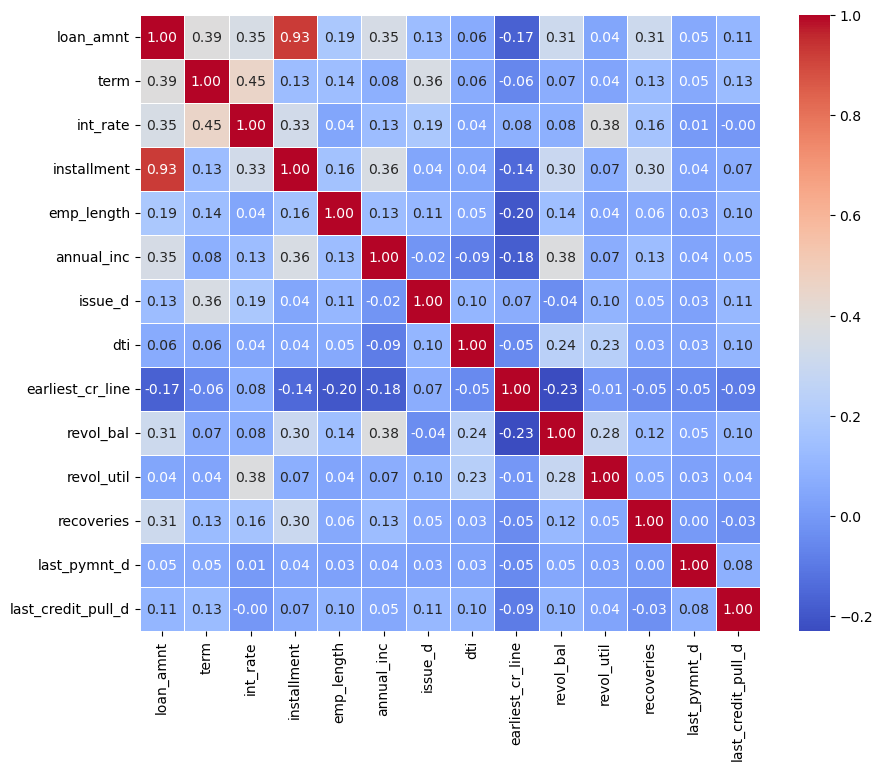

In [235]:

plt.figure(figsize=(10, 8))
df_charged_off = df[df['loan_status'] == 'Charged Off']

sns.heatmap(df_charged_off[['loan_amnt', 'term', 'int_rate', 'installment', 'emp_length',
    'annual_inc', 'issue_d', 'dti',
     'earliest_cr_line', 'revol_bal', 'revol_util', 'recoveries', 
    'last_pymnt_d', 'last_credit_pull_d',]].corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
       

### Lets generate a heat map for Fully Paid Loan cateogory for numerical attributes

<Axes: >

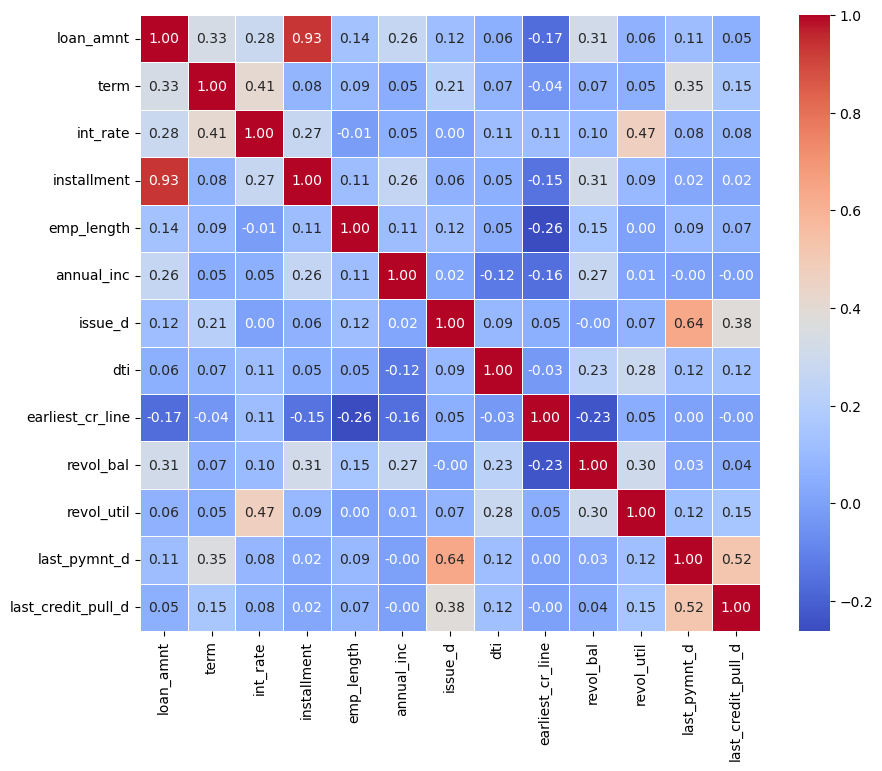

In [240]:
plt.figure(figsize=(10, 8))
df_fully_paid = df[df['loan_status'] == 'Fully Paid']

sns.heatmap(df_fully_paid[['loan_amnt', 'term', 'int_rate', 'installment', 'emp_length',
    'annual_inc', 'issue_d', 'dti',
     'earliest_cr_line', 'revol_bal', 'revol_util',
    'last_pymnt_d', 'last_credit_pull_d',]].corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

### Key Findings from Heat Maps comparison for Fully Paid and Defaulters

- **Loan amount and installment** show strong correlation in both charged-off and fully paid loans, indicating a consistent relationship between the borrowed amount and repayment structure.  

- **Term and interest rate** are highly correlated in both cases, suggesting that longer-term loans tend to have higher interest rates regardless of repayment outcome.  

- **Revolving utilization and interest rate** exhibit a stronger correlation in charged-off loans, implying that defaulters tend to have higher credit utilization, making them riskier borrowers.  

- **Last credit pull date and last issue/payment date** are significantly more correlated in fully paid loans, suggesting that responsible borrowers check their credit balances more frequently.  

- **Term and loan amount** show higher correlation in charged-off loans, indicating that defaults are more common in larger, longer-term loans.  

- **Interest rate and loan amount** have a stronger correlation in charged-off loans, meaning defaulters tend to have both higher loan amounts and higher interest rates, reinforcing their risk profile.  


# Loan Default Risk Analysis - Loan Default Risk Analysis

---

## Executive Summary

### Objective
Identify factors driving loan default risk using **Exploratory Data Analysis (EDA)** to reduce credit losses, optimize lending policies, and improve risk assessment.

---

## Key Insights

### 1. Borrower’s Financial Profile
- **Loan-to-Income Ratio**:  
  - Applicants seeking loans exceeding **25% of their income** are more likely to default.
- **Debt-to-Income (DTI) Ratio**:  
  - Higher DTI values (**above 20%**) correlate with increased default risk.
- **Revolving Balance-to-Income Ratio**:  
  - Borrowers with a revolving balance over **20% of their income** are at higher risk.

### 2. Loan Parameters
- **Loan Amount**:  
  - Higher loan amounts (**$15,000 - $25,000**) have a greater likelihood of default.
- **Interest Rate**:  
  - Fully paid loans cluster between **5% and 10%**, while defaults are more prevalent at rates above **15%**.
- **Installments**:  
  - Higher monthly payments correlate with increased defaults; manageable installments are critical.

### 3. Borrower Demographics
- **Employment Length**:  
  - Borrowers with **shorter or very long employment histories** are more likely to repay successfully.
  - Those with **2-6 years** of employment face higher default risks.
- **Home Ownership**:  
  - **Renters** show higher default rates compared to homeowners or mortgage holders.
- **Verification Status**:  
  - Loans without verification exhibit higher default risks.
- **Delinquency History**:  
  - Borrowers with **past delinquencies** are significantly more likely to default.

### 4. Loan Term & Credit Grade
- **Loan Duration**:  
  - **60-month loans** have higher default rates than **36-month loans**, suggesting shorter terms are less risky.
- **Credit Grade**:  
  - Lower grades (D, E, F, G) show significantly higher default rates compared to higher grades (A, B, C).

### 5. Time-Based Trends
- **Early vs. Recent Borrowers**:  
  - Default rates were higher in earlier years (2011-2013) but improved with better credit policies over time.
- **Credit History Length**:  
  - Borrowers with longer credit histories (pre-2000) are less likely to default.

---

## Recommendations
1. Refine loan approval criteria by stricter cutoffs for Loan-to-Income, DTI, and Revolving Balance-to-Income thresholds.
2. Optimize interest rates to reduce defaults in high-risk segments (>15% rates).
3. Promote shorter loan terms (36 months) to mitigate risks.
4. Strengthen borrower verification processes and focus on renters as a higher-risk group.
5. Incorporate employment tenure, delinquenncy history, and credit grades into risk assessment models.
